# **Capstone project: Providing data-driven suggestions for HR**

## Description and Deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


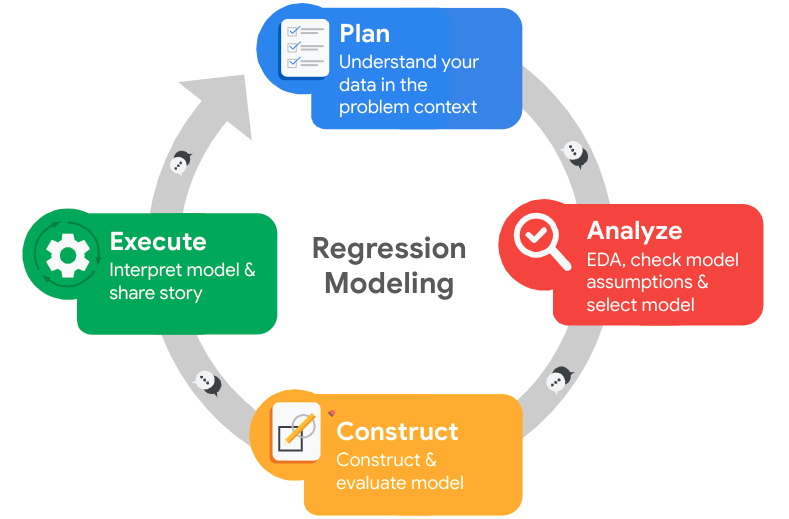

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: **what’s likely to make the employee leave the company?**

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*Who are your stakeholders for this project?*
- Our stakeholders are members of the Human Resources department, likely including the HR manager and other relevant employees.

*What are you trying to solve or accomplish?*
- Salifort Motors is experiencing employee turnover, and our team has been tasked with identifying the driving factors. We have been provided with employee data to analyze, examine, and identify trends and relationships. Ultimately, we will develop a model to predict which employees are most likely to leave the company based on a set of features (independent variables).  This information will inform a strategy to improve the areas that contribute most significantly to employee churn.

*What are your initial observations when you explore the data?*

*What resources do you find yourself using as you complete this stage? (Make sure to include the links.)*
- Previous projects will be useful for recalling specific processes and code.  Relevant Coursera materials will also provide guidance throughout the project. (Please insert the actual Coursera links here.)

*Do you have any ethical considerations in this stage?*
- While I don't have any immediate ethical concerns, the data potentially contains sensitive information, such as salaries, which must be kept private.




## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [171]:
# Import necessary packages for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import statistical functions and models
from scipy.stats import f_oneway, probplot
import statsmodels.api as sm

# Import machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.metrics import classification_report
from statsmodels.formula.api import logit
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree



### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [172]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head(10)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   
5                   3              0     1                      0      sales   
6                   4              0     1                      0      sales   
7                   5              0     1                      0      sales   
8                   5              0     1                      0      sales   
9                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low  
5     low  
6     low  
7     low  
8     low  
9     low

## Step 2. Data Exploration (Initial EDA and Data Cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [173]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [174]:
# Gather descriptive statistics about the data
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [175]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [176]:
# Rename columns as needed
df0.rename(columns = {'Work_accident':'work_accident','Department':'department','time_spend_company':'tenure','average_montly_hours':'average_monthly_hours' },inplace=True)

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [177]:
# Check for missing values
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check Duplicates

Check for any duplicate entries in the data.

In [178]:
# Check for duplicates
df0.duplicated().sum()

3008

In [179]:
# Inspect some rows containing duplicates as needed
duplicates = df0[df0.duplicated()]
duplicates.head()

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

In [180]:
# Compare the number of duplicates to the overall dataset
duplicates.shape[0]/df0.shape[0]

0.2005467031135409

Duplicate rows appear to make up approximately 20% of the total dataset.

In [181]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
df1.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

### Check Outliers

Check for outliers in the data.

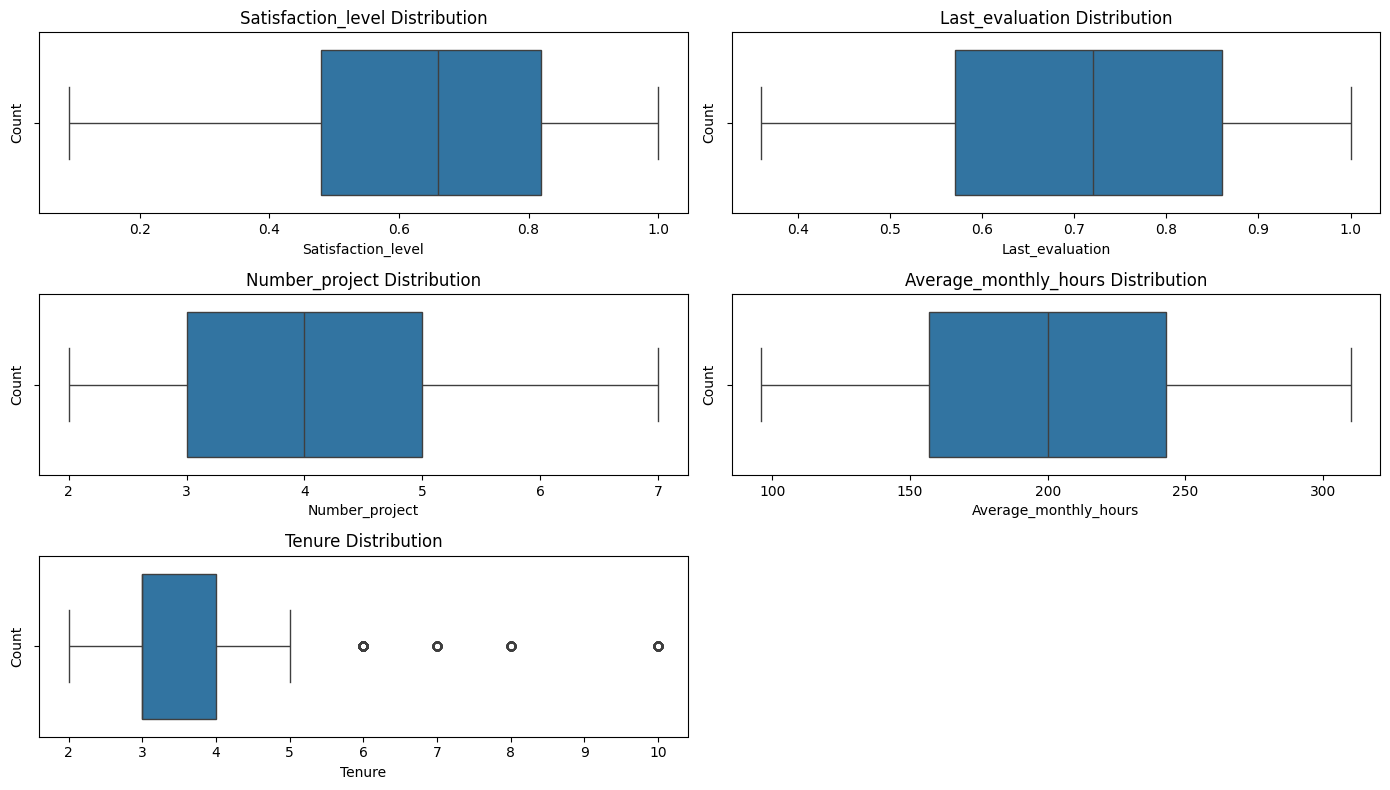

In [182]:
# Check for outliers
columns_to_check = ['satisfaction_level','last_evaluation','number_project','average_monthly_hours','tenure']

plt.figure(figsize=(14,8))

for i, col in enumerate(columns_to_check):
    plt.subplot(3,2, i + 1)
    sns.boxplot(df1[col], orient='h')
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.tight_layout()

##### Insights
- Tenure appears to be the only variable with outliers. These will likely need to be handled through using the IQR as a cut-off.

In [183]:
# Determine the number of rows containing outliers
tenure_outliers = df1[(df1['tenure'] > 5)]
tenure_outliers.shape[0]

824

In [184]:
# Remove outliers with the IQR method
q1 = df1['tenure'].quantile(0.25)
q3 = df1['tenure'].quantile(0.75)
iqr = q3 - q1

# Filter out outliers
df1 = df1[(df1['tenure'] >= q1 - 1.5*iqr) & (df1['tenure'] <= q3 + 1.5*iqr)]

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [185]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))

left
0    9285
1    1882
Name: count, dtype: int64
left
0    0.831468
1    0.168532
Name: proportion, dtype: float64


It appears ~17% of employees left, while ~83% were retained. Due to the imbalance in the target variable, a decision will have to be made later regarding upsampling the minority class, or ensuring the model used can handle skew effectively.

### Data Visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

#### **Univariate Visualizations**

#### Continuous Numeric Variables

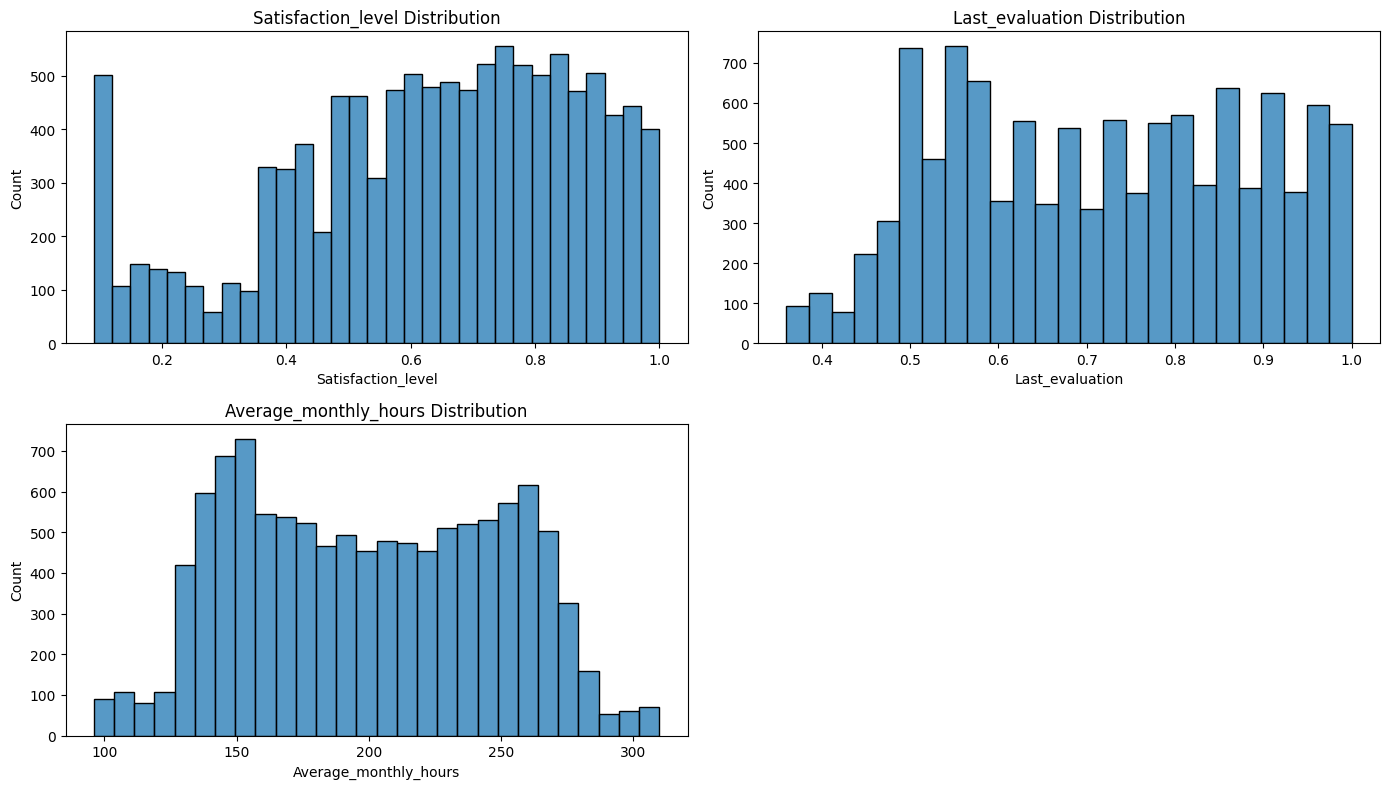

In [186]:
# Visualize the distribution of the target variable
continuous_numeric_variables = ['satisfaction_level','last_evaluation','average_monthly_hours']

plt.figure(figsize=(14,8))

for i, col in enumerate(continuous_numeric_variables):
    plt.subplot(2,2, i + 1)
    sns.histplot(df1[col])
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.tight_layout()

##### Insights
- Only 'average_monthly_hours' resembles a normal distribution. The others appear slightly left skewed. Overall, it appears that many are satisfied with their roles, with the majority of values ranging from 60% - 80%. Evaluation scores appear to range from approximately 50% - 95%, and the average monhtly hours falls between approximately 140-275, which is considerable.

#### Discrete Numeric Variables

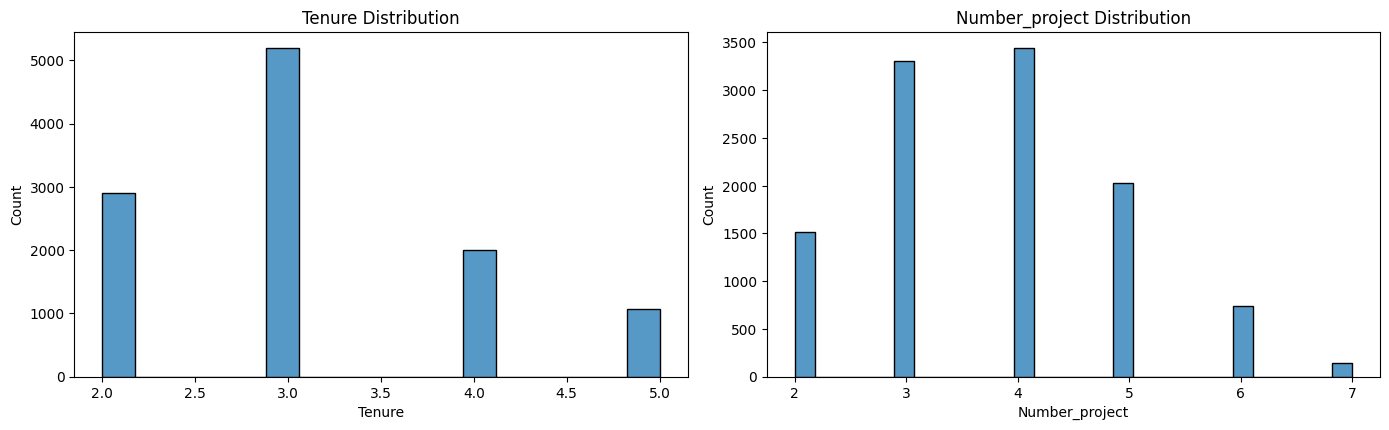

In [187]:
# Visualize the distribution of the target variable
discrete_numeric_variables = ['tenure','number_project']

plt.figure(figsize=(14,8))

for i, col in enumerate(discrete_numeric_variables):
    plt.subplot(2,2, i + 1)
    sns.histplot(df1[col])
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.tight_layout()

##### Insights
- Both have an approximately normal distribution, with 'number_project' being slightly right-skewed. It appears 3 years is the most common length of time for an employee to be employed for before leaving, whether willingly or not. According to the number of projects, the most frequent number of projects undertaken is approximately 3-4.

#### Categorical Variables

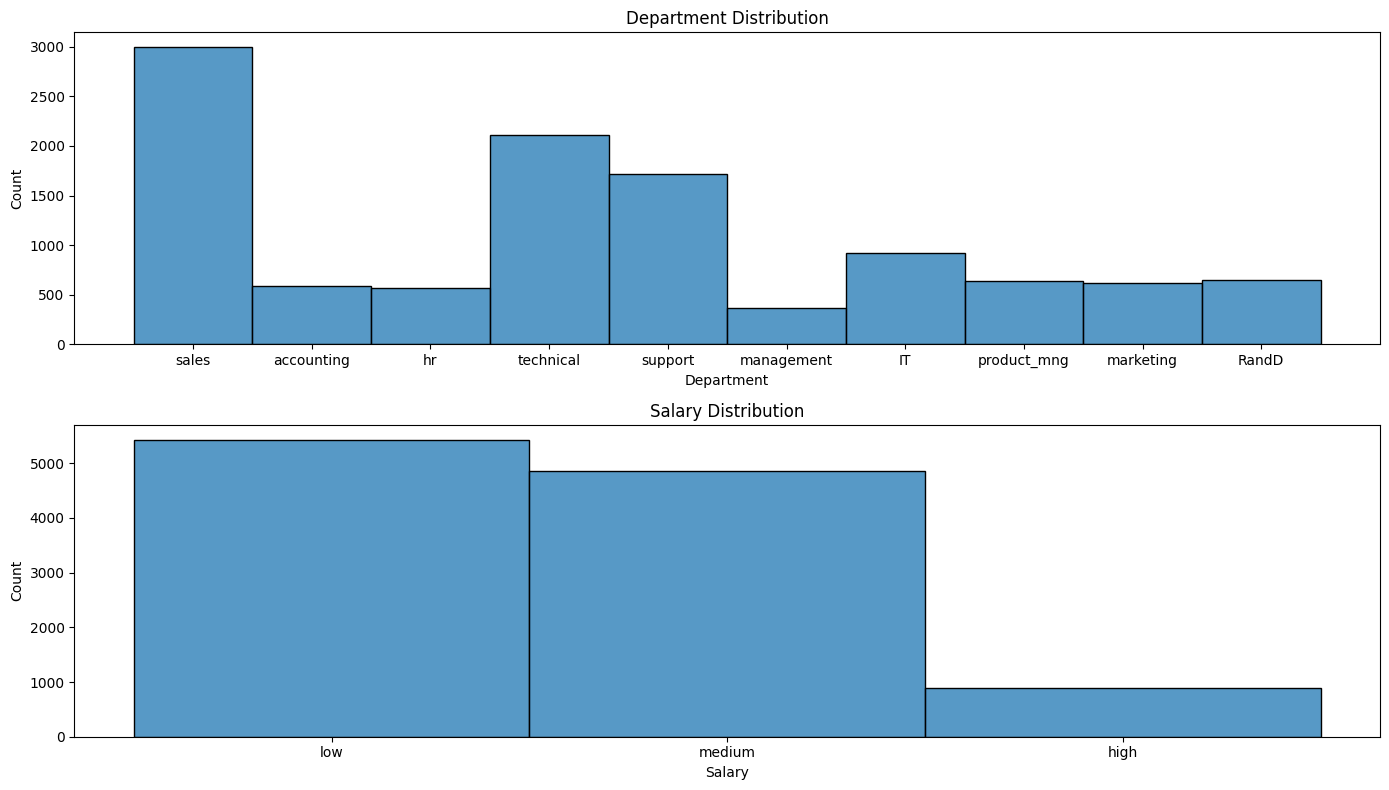

In [188]:
# Visualize the distribution of the target variable
categorical_variables = ['department','salary']

plt.figure(figsize=(14,8))

for i, col in enumerate(categorical_variables):
    plt.subplot(2,1, i + 1)
    sns.histplot(df1[col])
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.tight_layout()

##### Insights
- For department, there is a particularly significant imbalance regarding Sales comared to others. For salary, the high class is less frequent compared to low and medium. Sales, technical and support contain the most employees, while the salary counts are skewed toward low and medium, which makes sense based on basic organizational hierarchies.

#### Binary Variables

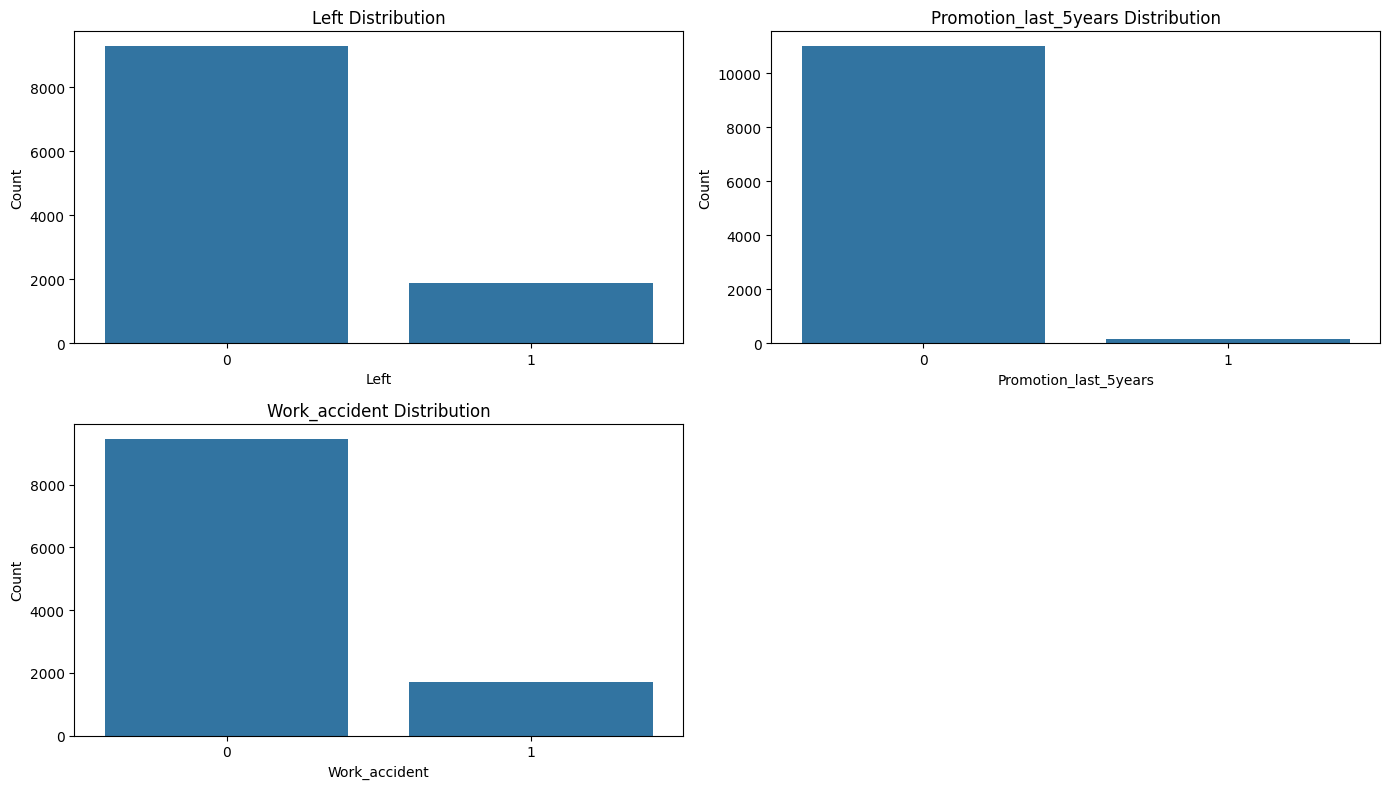

In [189]:
# Visualize the distribution of the binary variables
binary_variables = ['left','promotion_last_5years','work_accident']

plt.figure(figsize=(14,8))

for i, col in enumerate(binary_variables):
    plt.subplot(2,2, i + 1)
    sns.countplot(data=df1, x=col)
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.tight_layout()

##### Insights
- As indicated earlier, there is an imbalance in the dependent variable 'left', with more employees staying vs leaving. There is also considerable skew within the 'promotion_last_5years' and 'work_accident' variables. It appears not many employees were promoted within the last 5 years, and many have not suffered a work accident.

#### **Bivariate Visualizations**

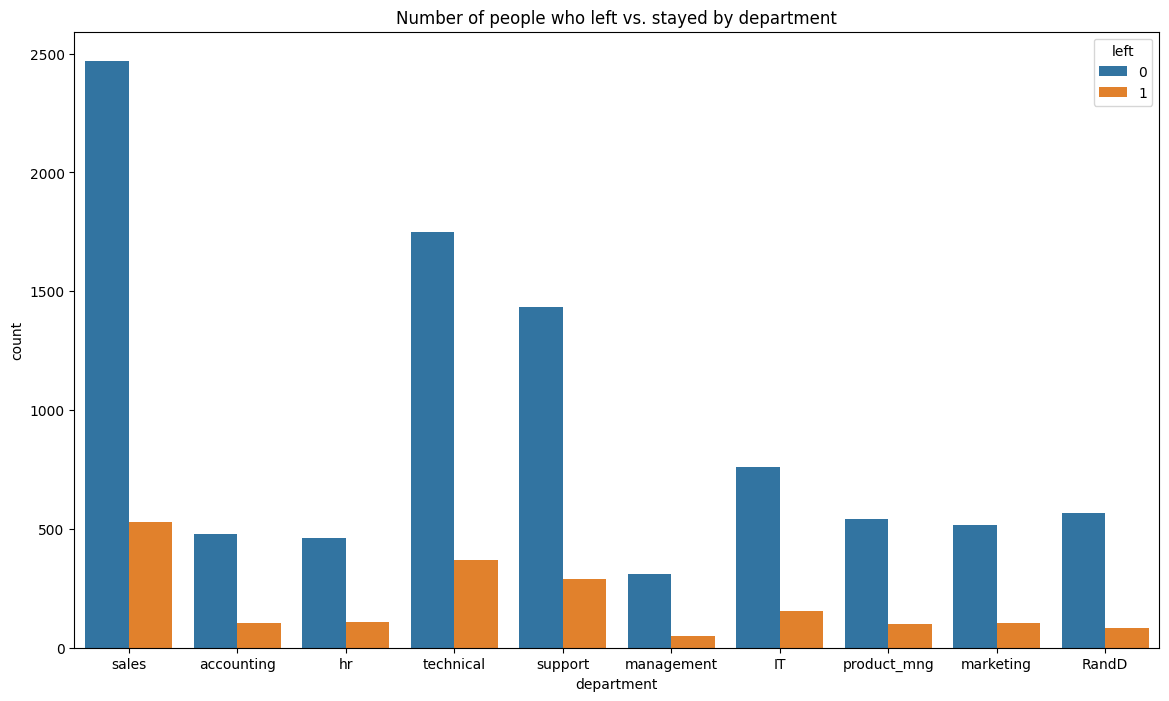

In [190]:
# Create a plot comparing the number of people who left vs. stayed by department
plt.figure(figsize=(14,8))
sns.countplot(x='department', hue='left', data=df1)
plt.title('Number of people who left vs. stayed by department')
plt.show()

##### Insights
- It appears the department with the highest rate of churn is Sales, Technical and Support. The fewest is Management, which doesn't seem surprising as those in management roles have not only likely been with the company longer, but are typically individuals that are more engaged for the long-term.

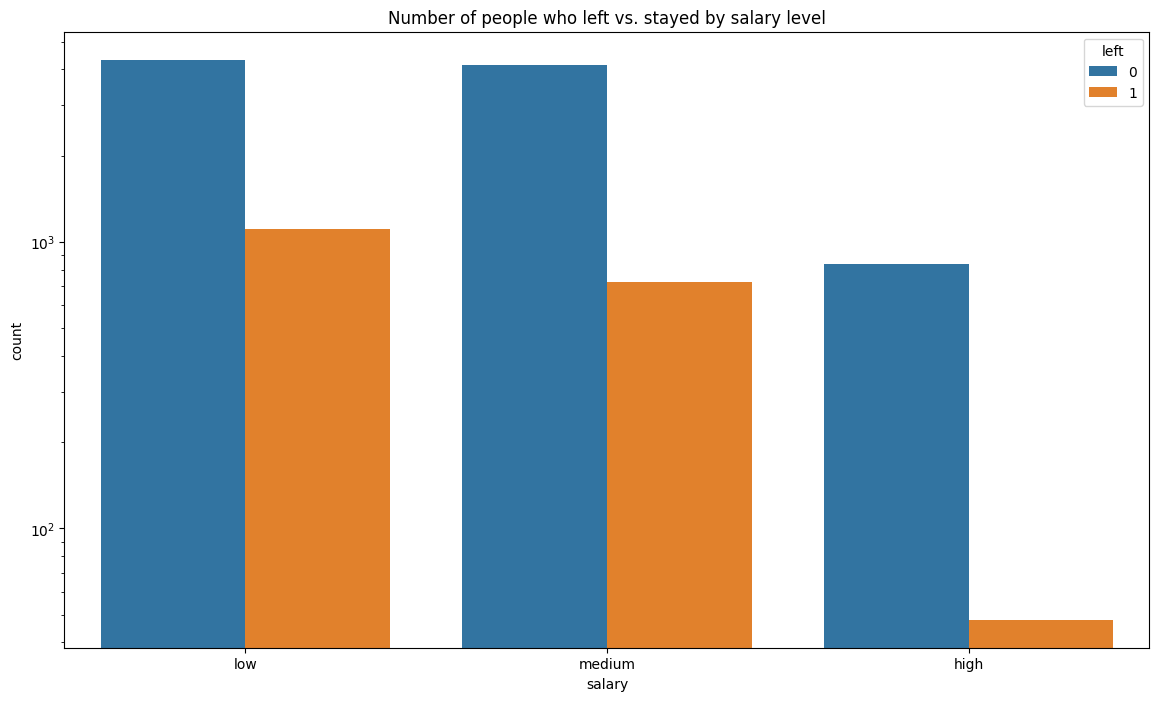

In [191]:
# Create a plot comparing the number of people who left vs. stayed by salary level
plt.figure(figsize=(14,8))
sns.countplot(x='salary', hue='left', data=df1)
plt.title('Number of people who left vs. stayed by salary level')
plt.yscale('log')
plt.show()

##### Insights
- Unsurprising that the higher the salary level, the more likely the employee was to be retained. Churn rates for the low and medium salary groups are fairly high, over 50%. Factors that could be contributing to this are being overworked, less satisfaction with the role and so forth.

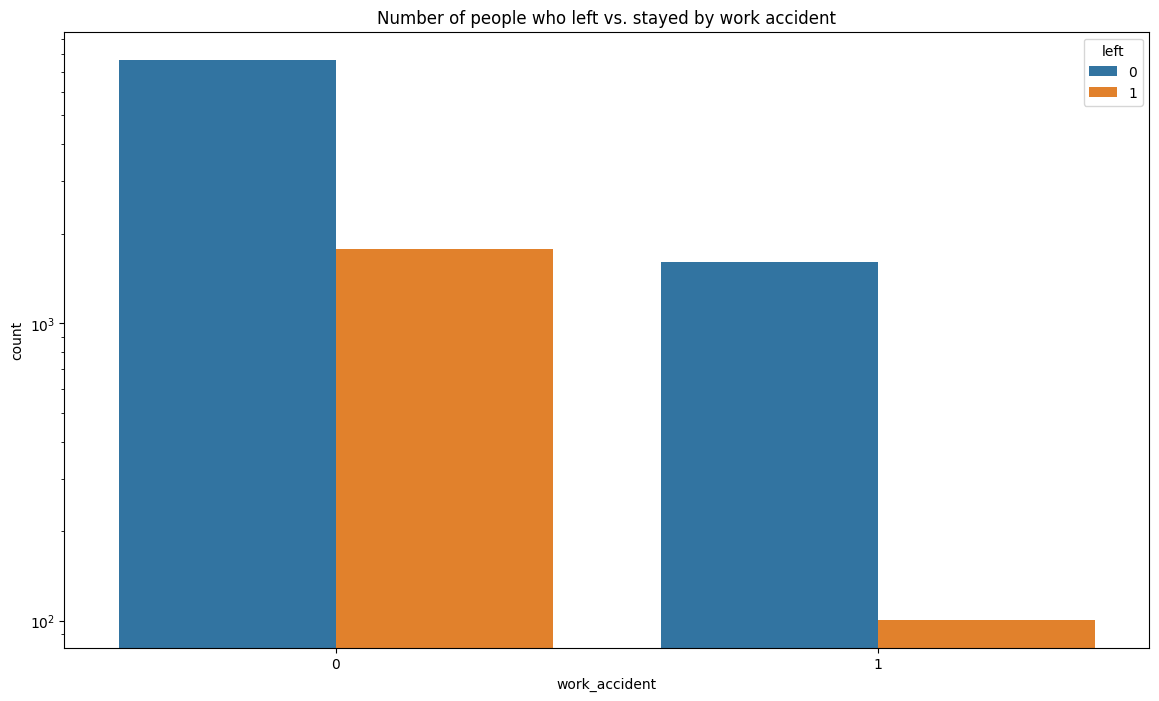

In [192]:
# Create a plot comparing the number of people who left vs. stayed by work accident
plt.figure(figsize=(14,8))
sns.countplot(x='work_accident', hue='left', data=df1)
plt.title('Number of people who left vs. stayed by work accident')
plt.yscale('log')
plt.show()

##### Insights
- Although it appears those who experienced a work accident are comparatively less likely to churn, this may also be due to an imbalance in the feature data. It would not be expected for a large portion of employees to have workplace accidents, and if this were true, then there is a much bigger issue occurring that requires its own investigation.

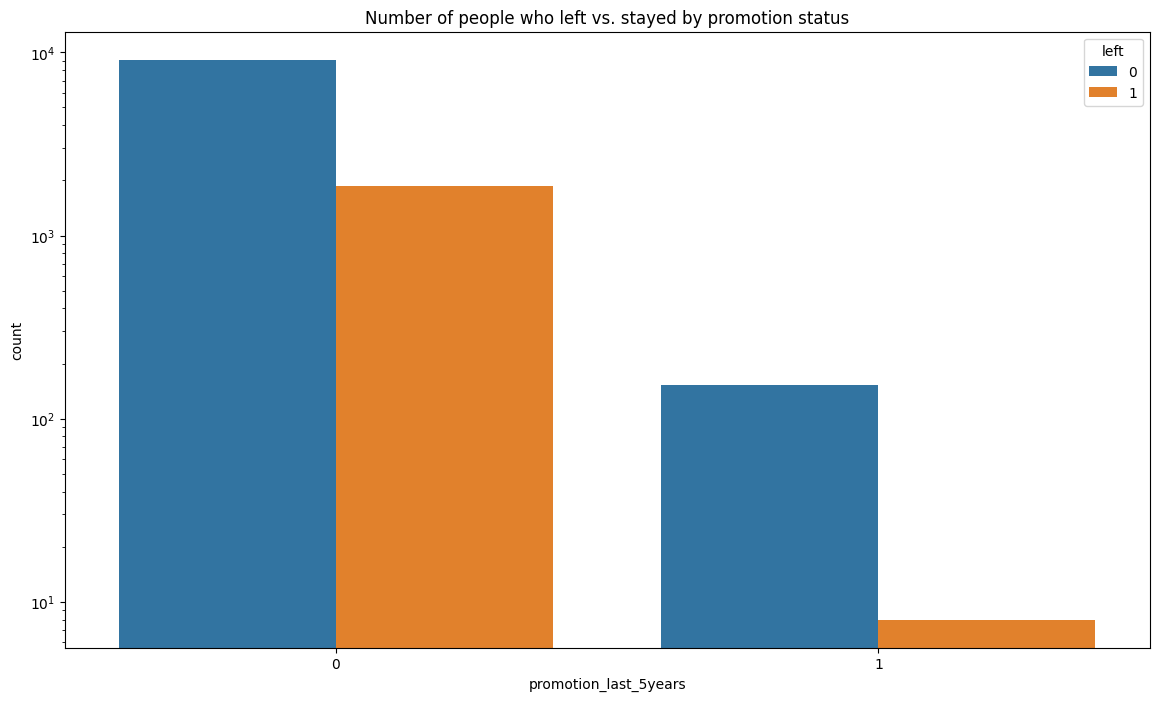

In [193]:
# Create a plot comparing the number of people who left vs. stayed by promotion status
plt.figure(figsize=(14,8))
sns.countplot(x='promotion_last_5years', hue='left', data=df1)
plt.title('Number of people who left vs. stayed by promotion status')
plt.yscale('log')
plt.show()

##### Insights
- It appears that employees that received a promotion within the last 5 years, were less likely to leave the company compared to those that did not, which is unsurprising as a promotion is likely to lead to a salary increase and change in role responsibilities.

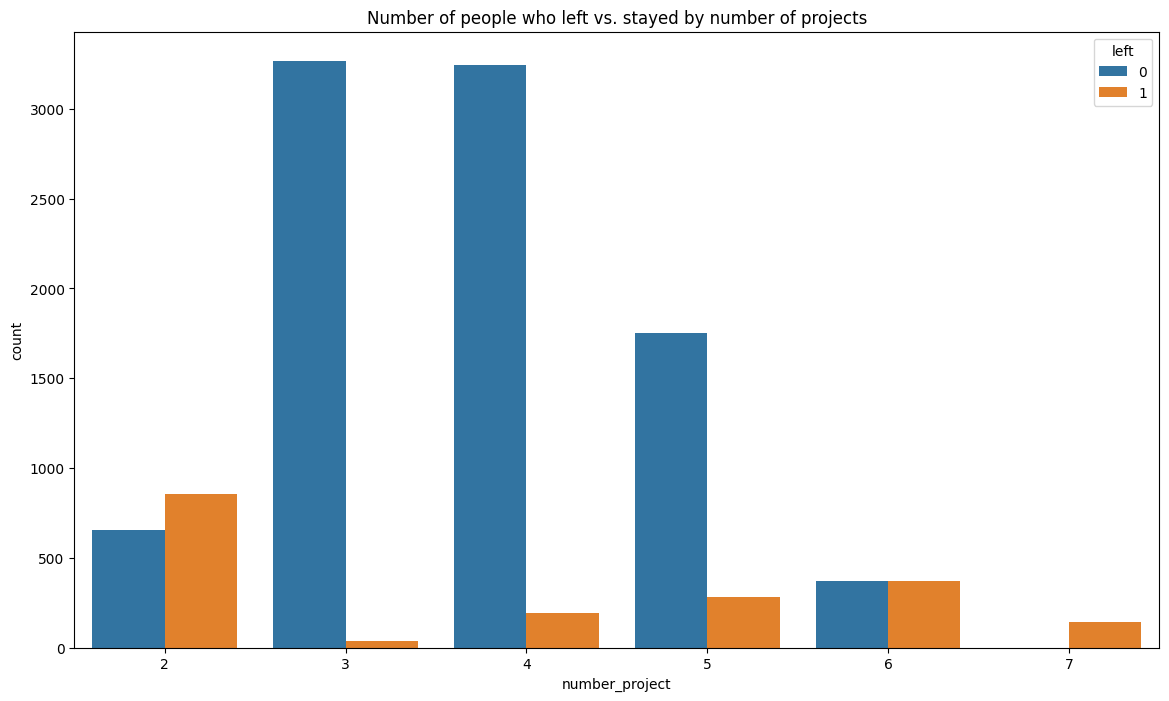

In [194]:
# Create a plot comparing the number of people who left vs. stayed by number of projects
plt.figure(figsize=(14,8))
sns.countplot(x='number_project', hue='left', data=df1)
plt.title('Number of people who left vs. stayed by number of projects')
plt.show()


##### Insights
- It appears that as the number of projects increases for an employee, the liklihood of them leaving the company increases. This is likely correlated to work load and quality of life. After 3 projects, the churn rate increases significantly, indicating that capping active projects per employee likely plays an important role in overall satisfaction levels and retention rates. Approximately 3-4 projects appears to be the balance between engagement and being overworked.

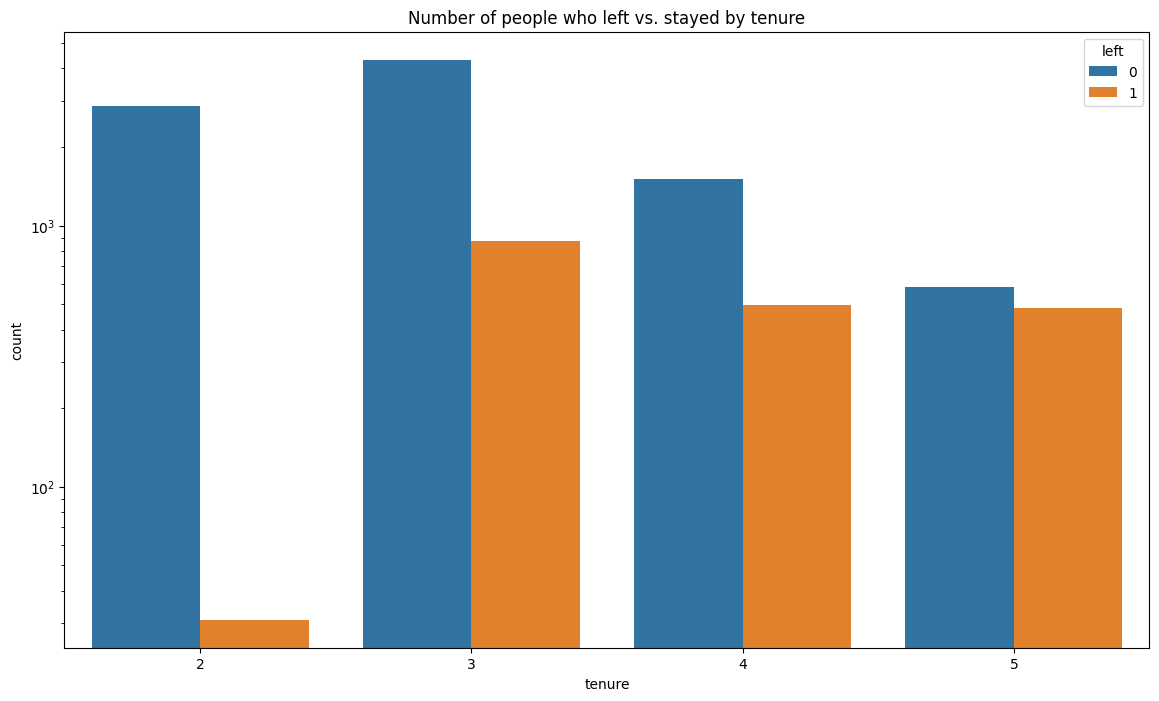

In [195]:
# Create a plot comparing the number of people who left vs. stayed by tenure
plt.figure(figsize=(14,8))
sns.countplot(x='tenure', hue='left', data=df1)
plt.title('Number of people who left vs. stayed by tenure')
plt.yscale('log')
plt.show()

##### Insights
- It appears once the 3 year mark is reached, the liklihood of an employee leaving increases significantly. This could be due to satisfaction with the role, lack of compensation increases overtime, being overworked, and so forth. That being said, once the 6 year mark is reached, employee churn decreases, which may be due to management roles or those that received promotions and salary increases.

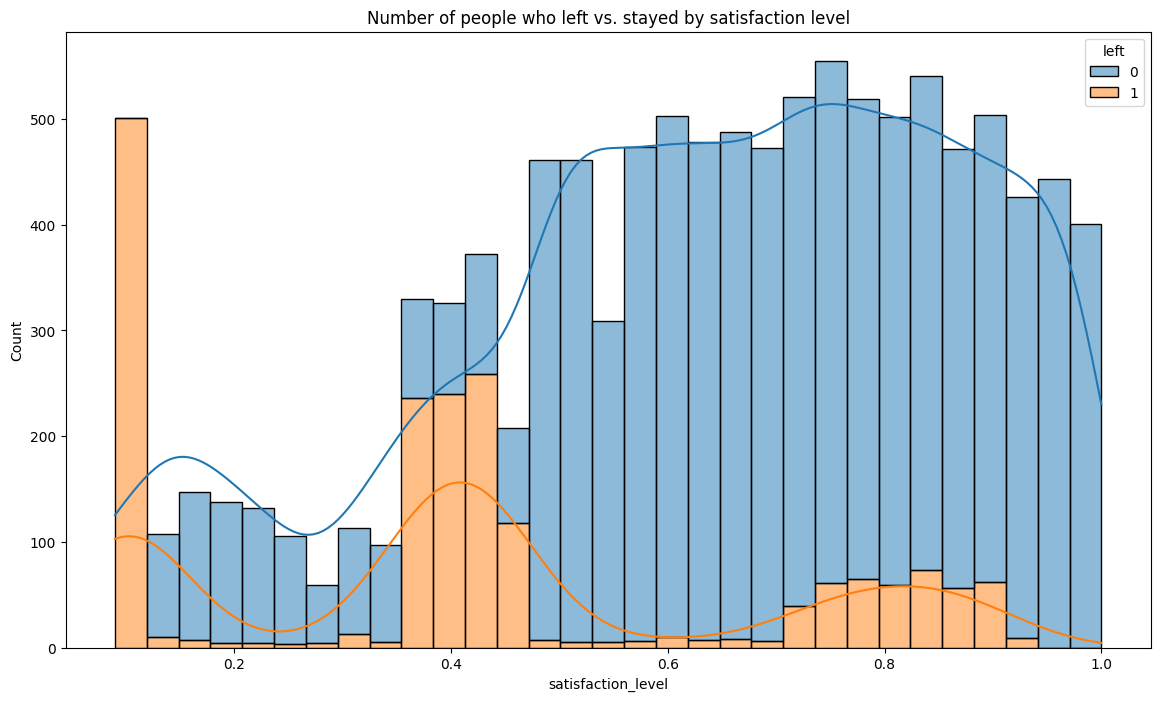

In [196]:
# Create a plot comparing the number of people who left vs. stayed by satisfaction level
plt.figure(figsize=(14,8))
sns.histplot(data=df1, x='satisfaction_level', hue='left', kde=True, multiple='stack')
plt.title('Number of people who left vs. stayed by satisfaction level')
plt.show()

##### Insights
- Unsurprisingly, as satisfaction rate increases, employee retention increases as well. Around the 40% satisfaction mark, churn rates increase significantly, and once again around the 80% mark. 

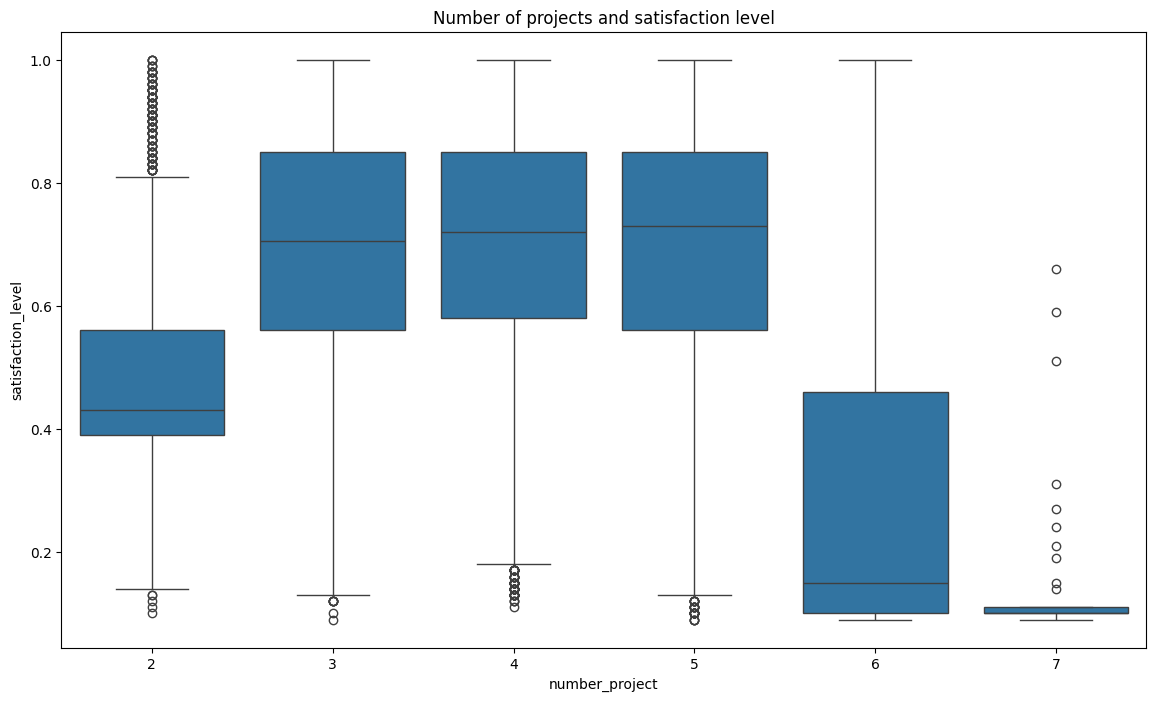

In [197]:
# Creat a plot comparing number of projects and satisfaction level
plt.figure(figsize=(14,8))
sns.boxplot(x='number_project', y='satisfaction_level', data=df1)
plt.title('Number of projects and satisfaction level')
plt.show()

##### Insights
- Similar to what was seen in a previous plot comparing number of projects and whether the employee stayed or not, there is a similar pattern here. As the number of projects an employee is working on increase, satisfaction levels take a significant dip, around the 6 project mark. Up until 5 satisfaction levels remain relatively constant.

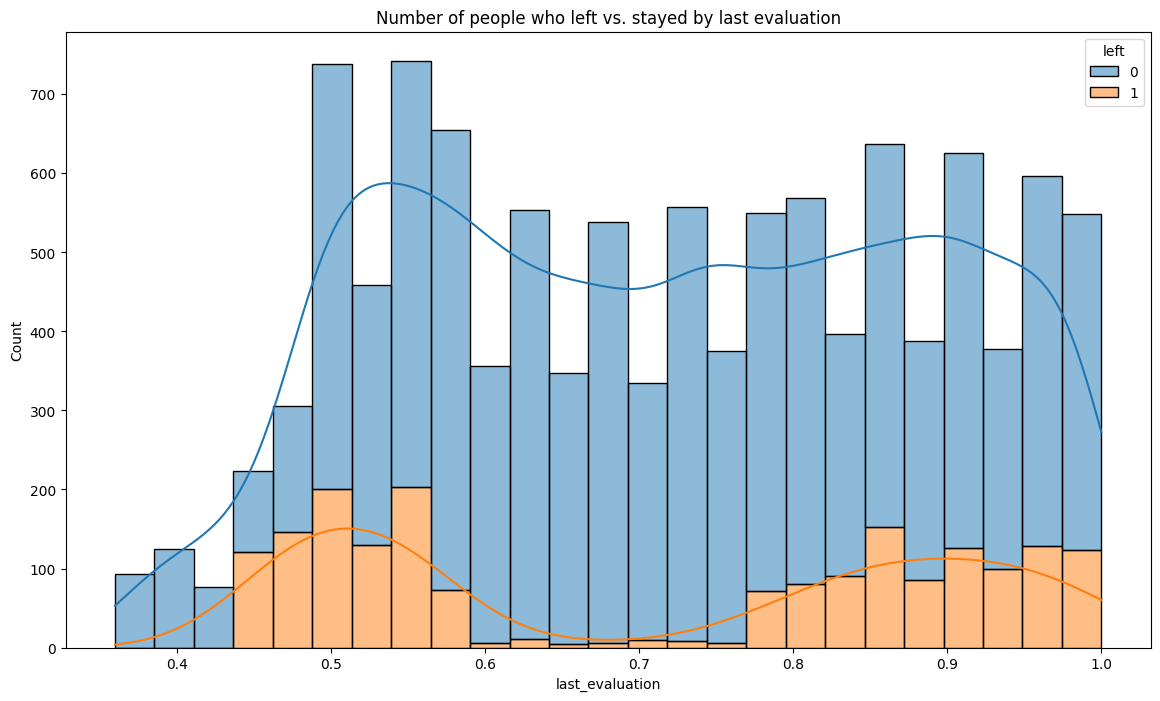

In [198]:
# Create a plot comparing the number of people who left vs. stayed by last evaluation
plt.figure(figsize=(14,8))
sns.histplot(data=df1, x='last_evaluation', hue='left', kde=True, multiple='stack')
plt.title('Number of people who left vs. stayed by last evaluation')
plt.show()

##### Insights
- Generally, it appears that higher performance review scores correlate with higher retention. That being said, around the 50% evaluation mark, and ~85% evaluation mark, churn appears to actually increase. It could be that those rated at 50% were either dismissed or felt slighted and decided to leave. And at the >85% mark, it could be those that were given higher performance reviews, decided to move on to other roles, or no longer felt fulfilled in the role. Additionally, it may also indicate that these individuals, who may be working on many projects simultaneously, are overworked, yet receiving high evaluation scores, are finally deciding to leave the company.

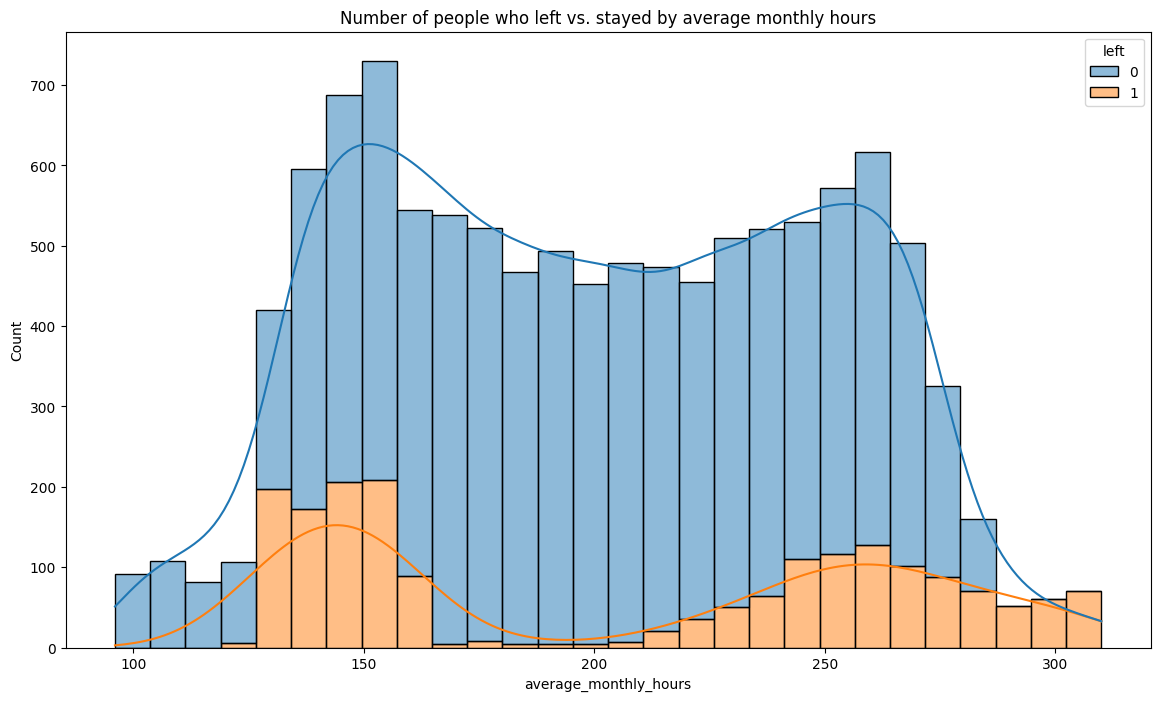

In [199]:
# Create a plot comparing the number of people who left vs. stayed by average monthly hours
plt.figure(figsize=(14,8))
sns.histplot(data=df1, x='average_monthly_hours', hue='left', kde=True, multiple='stack')
plt.title('Number of people who left vs. stayed by average monthly hours')
plt.show()

##### Insights
- At approximately the 150-160 monthly hour mark, churn increases, but then drops significantly until approximately the 225 monthly hour mark. This low rate of churn during this section may be indicative overtime pay incentivizing those to stay, even though they are working more hours. After the 225 hour mark, however, churn rates begin to rise, as hours vs compensation is likely becoming a factor.

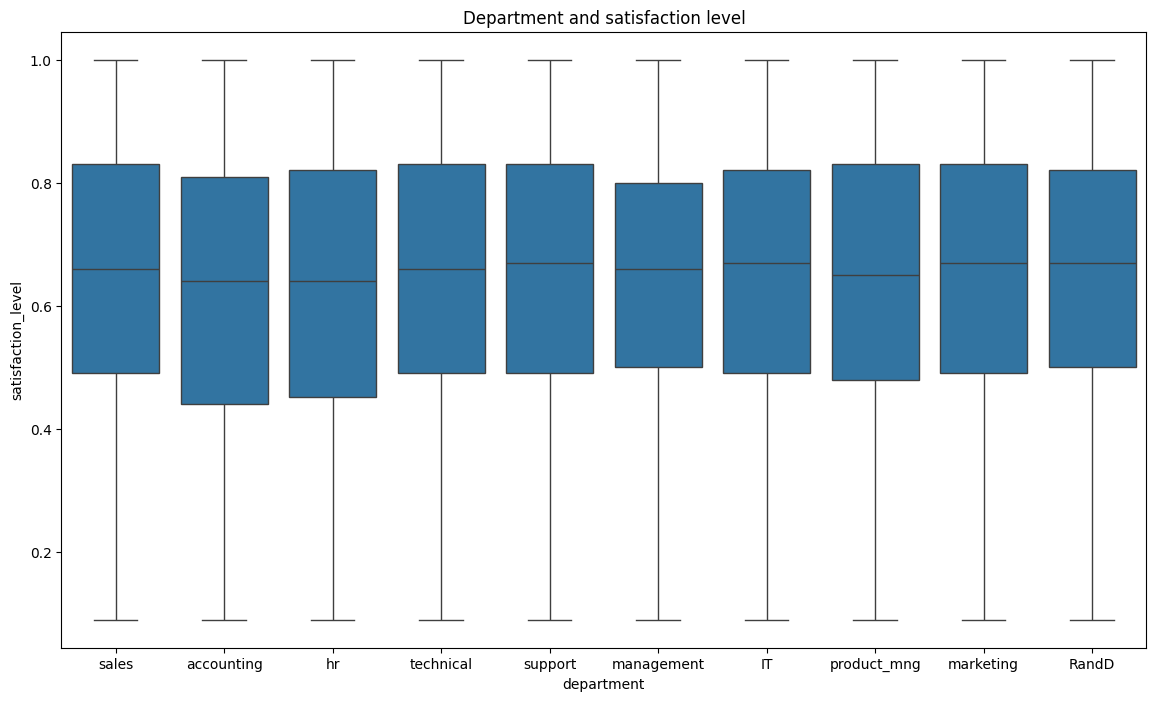

In [200]:
# Create a plot comparing department and satisfaction level
plt.figure(figsize=(14,8))
sns.boxplot(x='department', y='satisfaction_level', data=df1)
plt.title('Department and satisfaction level')
plt.show()

##### Insights
- Across the various departments, it appears satisfaction level is relatively consistent. There is a slight increase in Support and Sales vs others, which may be due to other factors, such as salary rates.

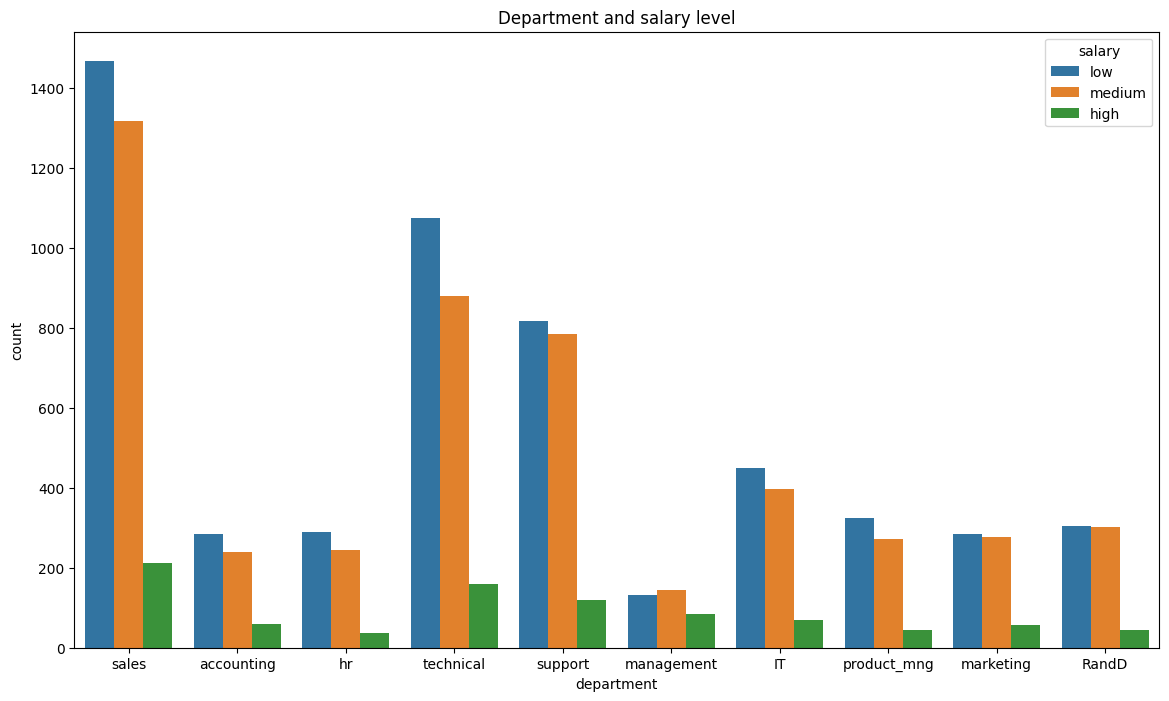

In [201]:
# Create a plot comparing department and salary level
plt.figure(figsize=(14,8))
sns.countplot(x='department', hue='salary', data=df1)
plt.title('Department and salary level')
plt.show()

##### Insights
- There appears to be a significant jump in salary in the Sales, Techinical and Support departments, particularly in the Low and Medium ranges. For Sales, this is likely due to additional compensation, such as bonuses for making sales. For the Technical and Support departments, this could be due to the fact that on average, technical roles often have higher average and median salaries compared to other departments.

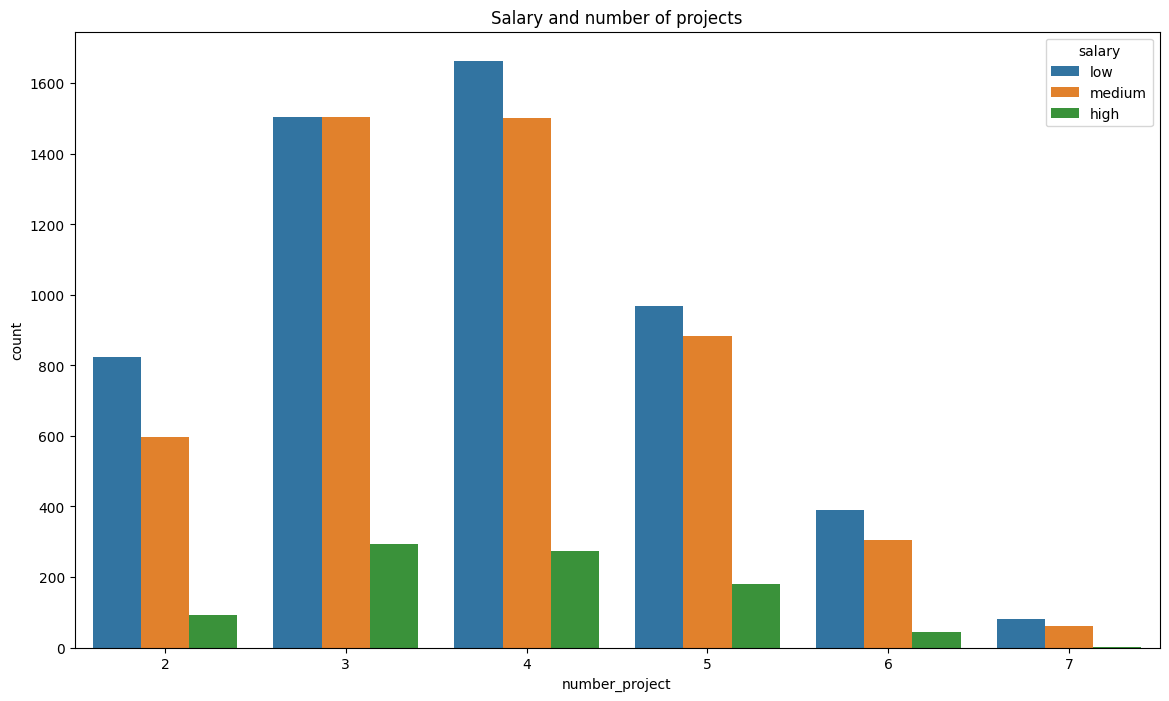

In [202]:
# Create a plot comparing salary and number of projects
plt.figure(figsize=(14,8))
sns.countplot(x='number_project', hue='salary', data=df1)
plt.title('Salary and number of projects')
plt.show()

##### Insights
- Number of projects per employee appears to correlate with salary rate, which is expected. This could be due to higher positions receiving more responsibilities and projects to work on, such as in Junior, Intermediate and Senior roles.

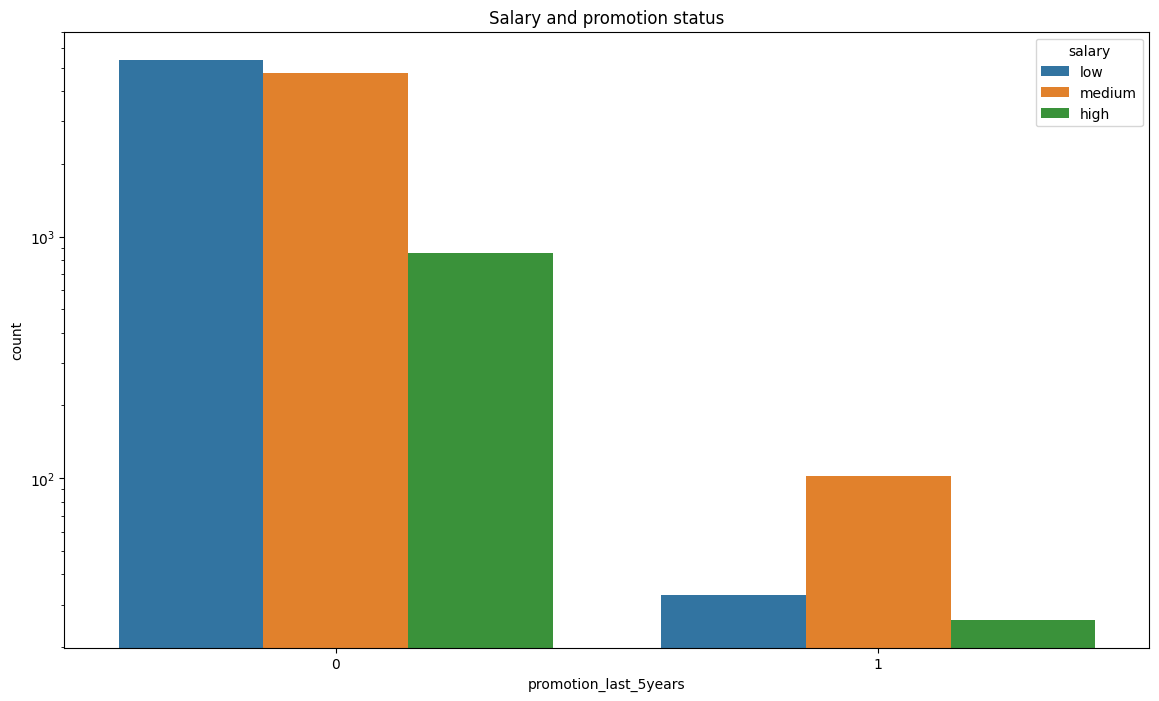

In [203]:
# Create a plot comparing salary and promotion status
plt.figure(figsize=(14,8))
sns.countplot(x='promotion_last_5years', hue='salary', data=df1)
plt.title('Salary and promotion status')
plt.yscale('log')
plt.show()

##### Insights
- Those in the medium salary group promoted within the last 5 years appear to be relatively higher than the low and high groups. The distribution of salary classes in the not promoted group is more even compare to that of the promoted group. In the promoted group, the medium salary group is significantly higher than the other two. Maybe this is indication of salary hikes for those already in a high salary group not being as significant as those in low and medium salary groups.

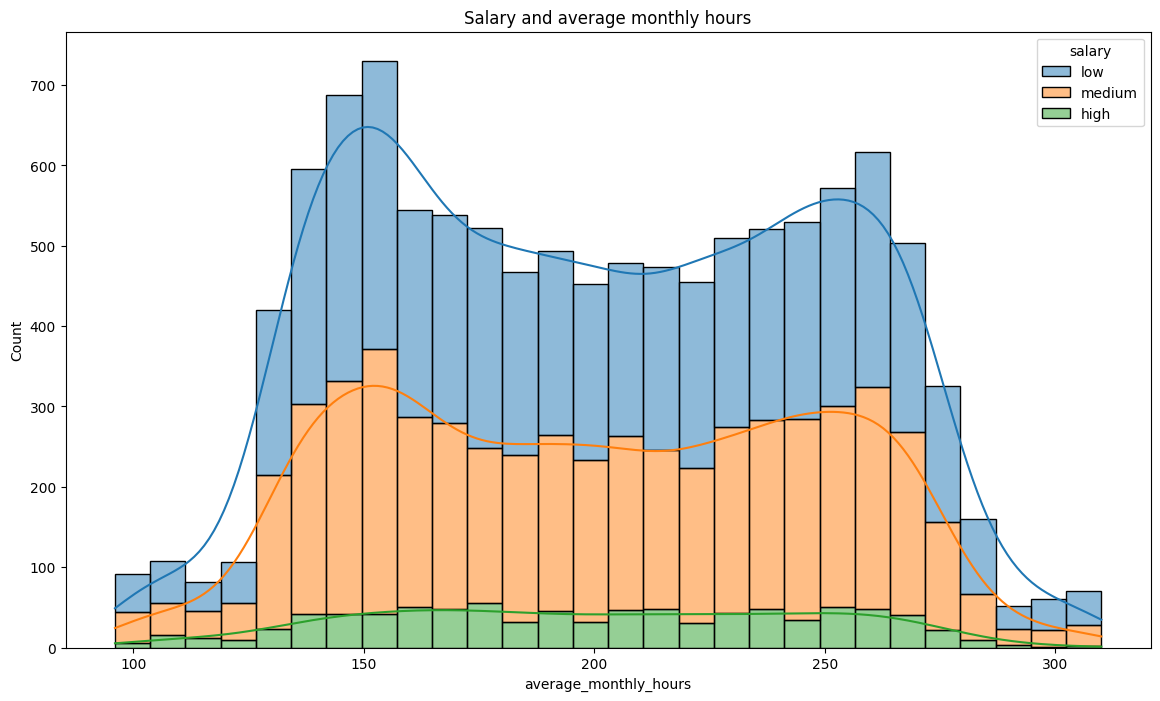

In [204]:
# Create a plot comparing salary and average monthly hours
plt.figure(figsize=(14,8))
sns.histplot(data=df1, x='average_monthly_hours', hue='salary', kde=True, multiple='stack')
plt.title('Salary and average monthly hours')
plt.show()

##### Insights
- Average monthly hours worked and salary appears relatively constant.

#### Overall Insights

- Unsuprisingly, when looking at overall satisfaction level, key indicators such as salary, number of projects (work), tenure (time with the company), promotion status and monthly hours all appeared to be in some way, correlated. Additionally, the variable salary appeared to be highly correlated with department and number of projects, and to a lesser extent, average monthly hours. Overall, satisfaction, influenced by these variables, appears to be correlated with retention.

### **Multivariate Visualizations**

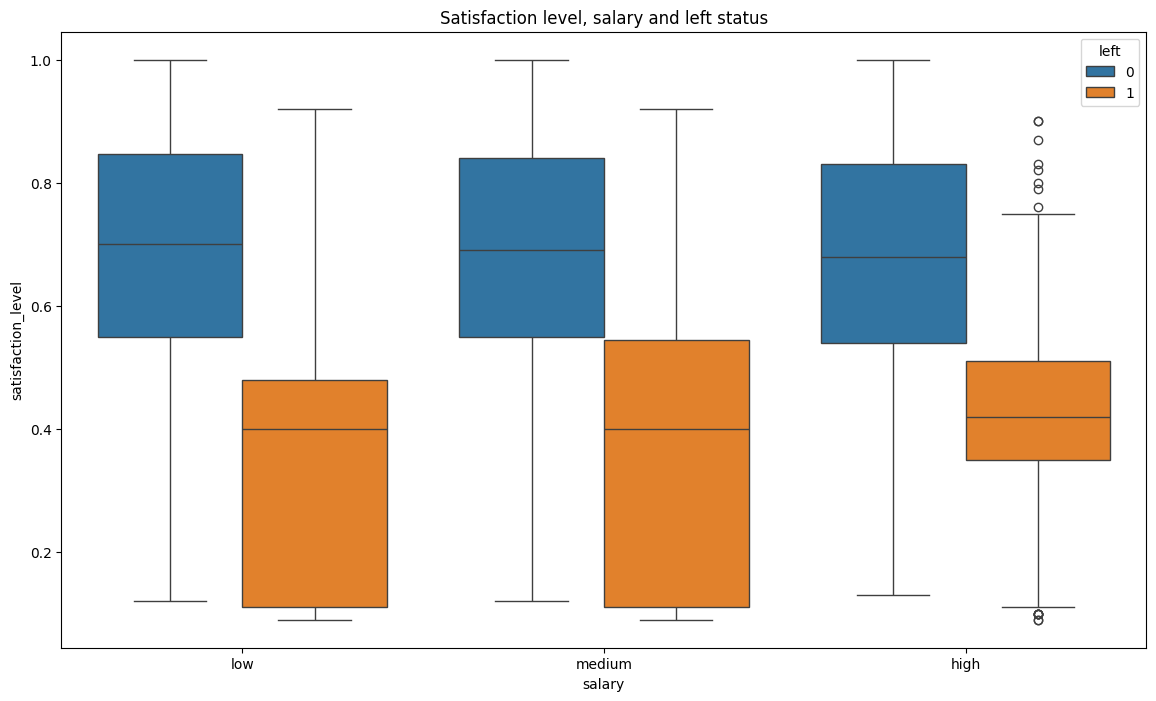

In [205]:
# Create a plot comparing satisfaction level, salary and left status
plt.figure(figsize=(14,8))
sns.boxplot(x='salary', y='satisfaction_level', hue='left', data=df1)
plt.title('Satisfaction level, salary and left status')
plt.show()

##### Insights
- There is a much wider range of churn rates across satisfaction levels in the low and medium groups, compared to the high group. Not too surprising, as those in high paying positions are generally less likely to leave their roles, and are likely in lead, supervisor or management positions.

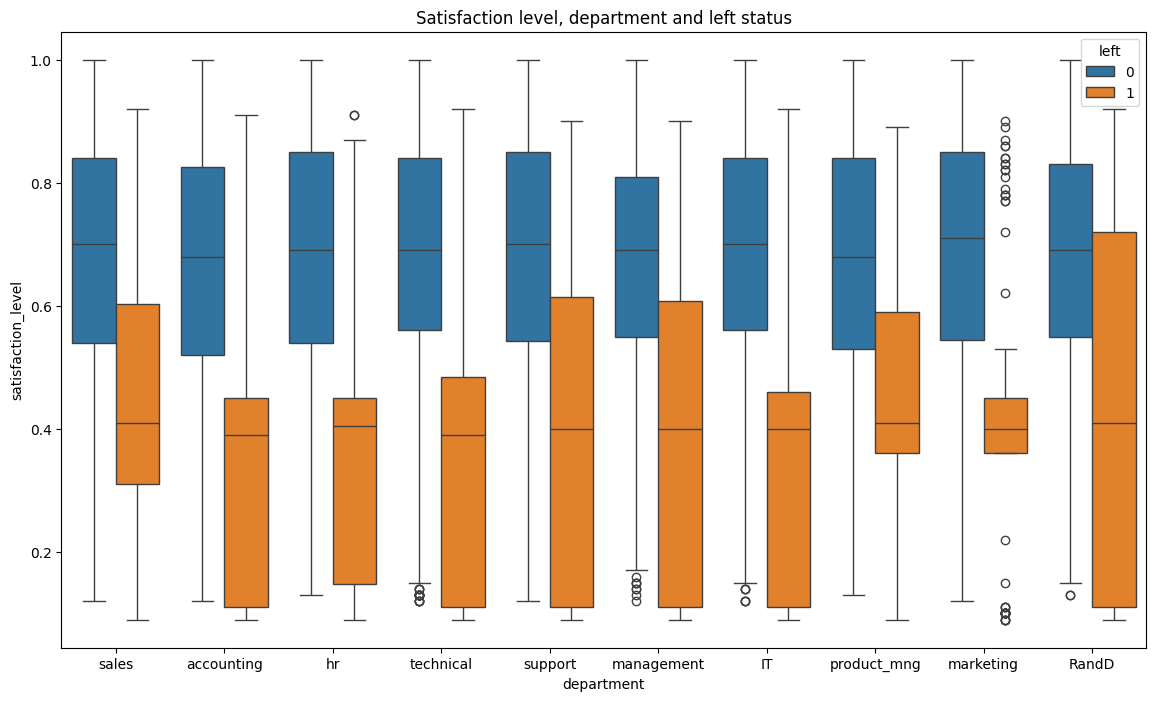

In [206]:
# Create a plot comparing satisfaction level, department and left status
plt.figure(figsize=(14,8))
sns.boxplot(x='department', y='satisfaction_level', hue='left', data=df1)
plt.title('Satisfaction level, department and left status')
plt.show()

##### Insights
- Satisifaction level for retained employees appears to be relatively stable across the various departments. However, when looking at those that left, there is a much more significant variation among them. Among Support, Management, and RandD, the range in satisfaction levels in which employees leave is much more spreadout, from ~10% to ~60%, whereas for other departments it's more condensed. 

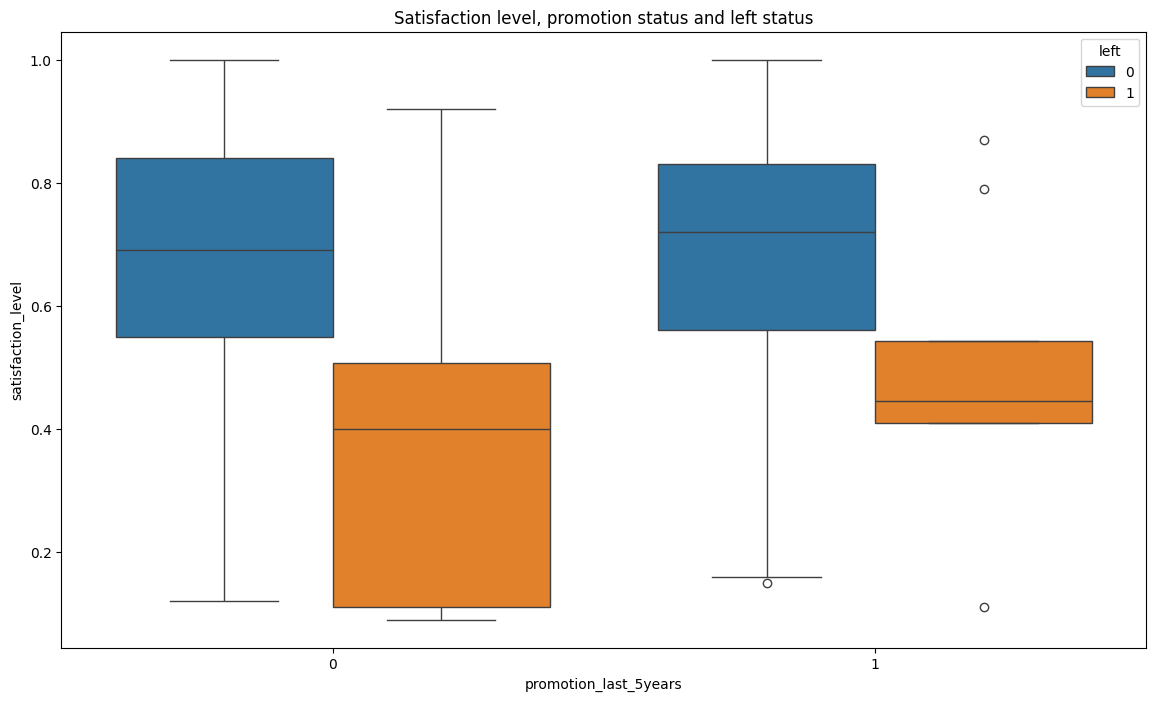

In [207]:
# Create a plot compariing satisfaction level, promotion status and left status
plt.figure(figsize=(14,8))
sns.boxplot(x='promotion_last_5years', y='satisfaction_level', hue='left', data=df1)
plt.title('Satisfaction level, promotion status and left status')
plt.show()

##### Insights
- For those that were not promoted within the last 5 years, the range of satisfaction levels for those that left is much more spread out, whereas it's more condensed for those that were promoted. Not surprising as those that were promoted were likely to not only have higher satisfaction levels overall.

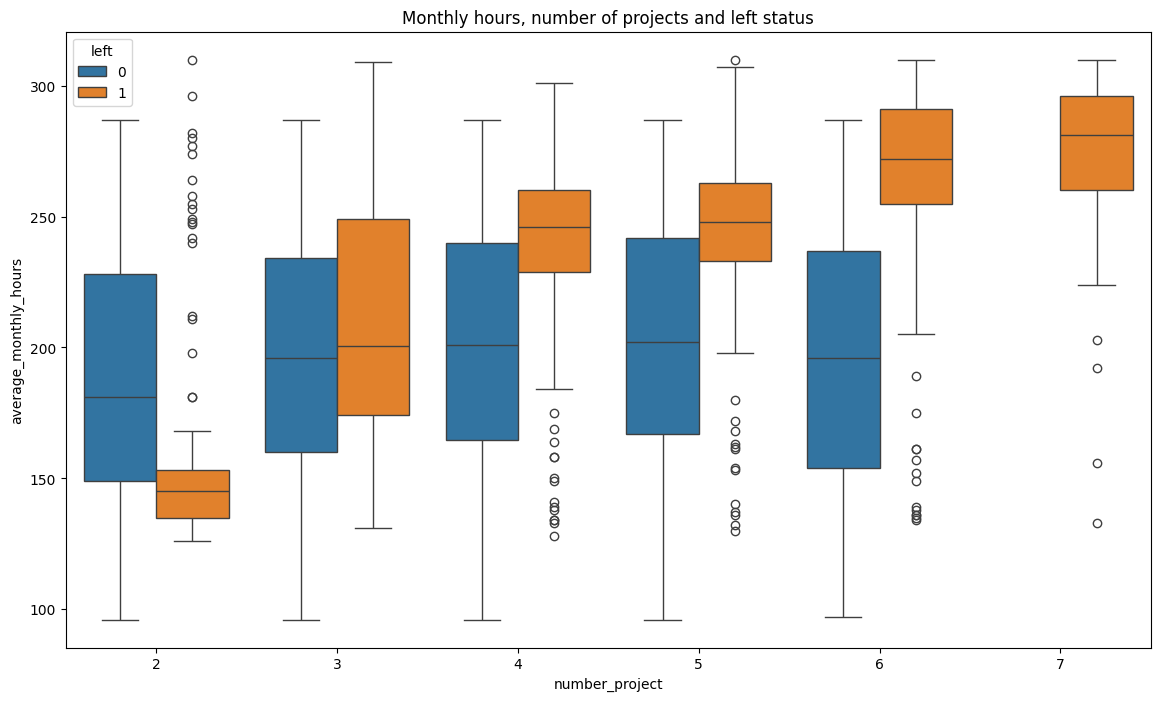

In [208]:
# Create a plot comparing monthly hours, number of projects and left status
plt.figure(figsize=(14,8))
sns.boxplot(x='number_project', y='average_monthly_hours', hue='left', data=df1)
plt.title('Monthly hours, number of projects and left status')
plt.show()

##### Insights
- As the number of projects per employee increases, the number of monthly hours an employee works begins to become more of a factor in whether they stay or leave. Once 4 projects is reached, the employees who left were working significantly more hours than those that remained, and once 7 projects are reached, no employees remained with the company. It appears there is a significant correlation between hours worked, satisifaction and overall retention.

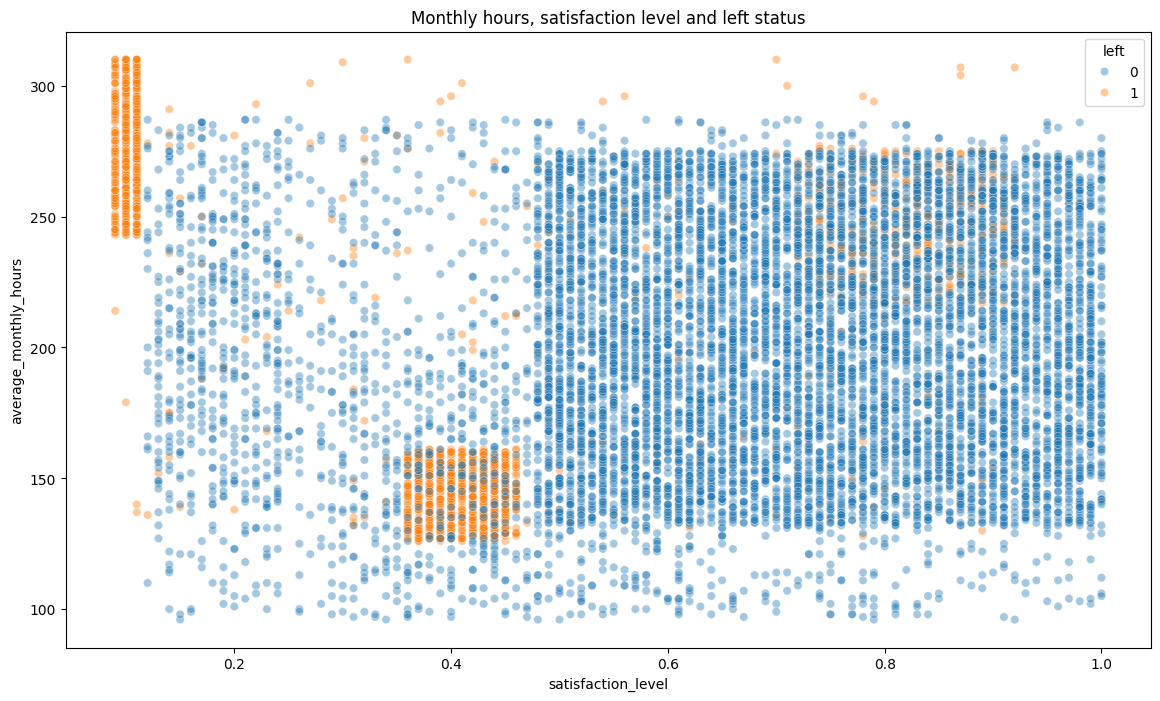

In [209]:
# Create a plot comparing monthly hours, satisfaction level and left status
plt.figure(figsize=(14,8))
sns.scatterplot(x='satisfaction_level', y='average_monthly_hours', hue='left', data=df1,alpha=0.4)
plt.title('Monthly hours, satisfaction level and left status')
plt.show()

##### Insights
- The top left corner indicates a group of employees that worked significantly more hours also left the company, and had much lower satisfaction levels. Around the 40% satisfaction mark, it appears there was also a group working around 150 monthly hours that left as well, but this could be due to employees that were terminated or had already resigned, as although the monthly hours worked is high, it's not nearly as high as those in the 250+ range.

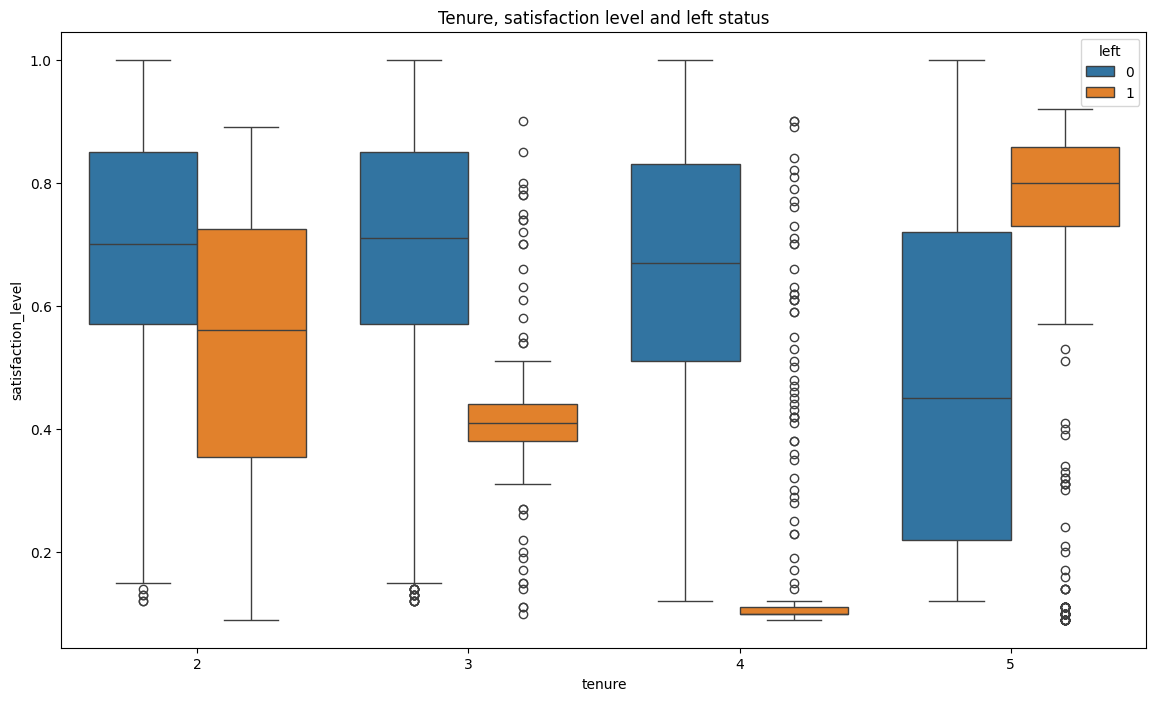

In [210]:
# Create a plot comparing tenure, satisfaction level and left status
plt.figure(figsize=(14,8))
sns.boxplot(x='tenure', y='satisfaction_level', hue='left', data=df1)
plt.title('Tenure, satisfaction level and left status')
plt.show()

##### Insights
- As tenure increases, satisfaction levels remain relatively consistent until the 5 year mark, where there is a sharp increase in churn, even though satisfaction levels are high. This could be simply due to the nature of profession changes within the industry or for work in general. Additionally, the spread of satisfaction level for remaining employees is much wider at the 5 year mark. This may indicate that by the 5th year, employees are starting to lack conviction or engagement if they haven't had reasons to remain, such as through promotions, salary increases, etc.

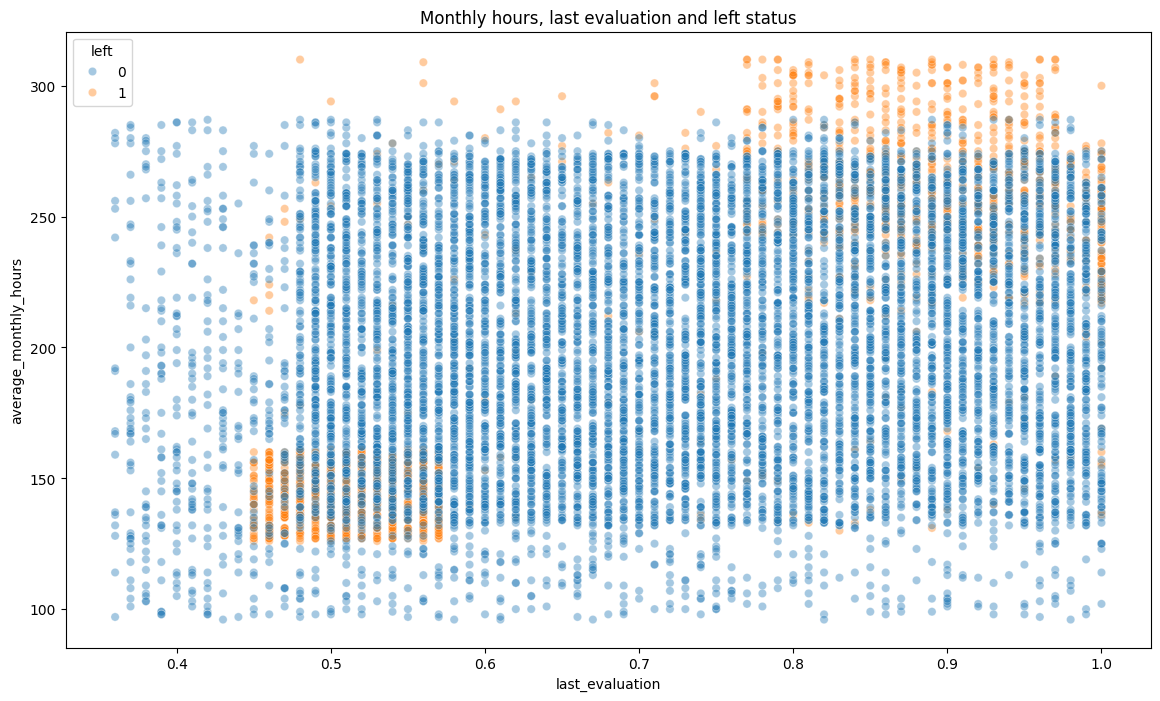

In [211]:
# Create a plot comparing monthly hours, last evaluation and left status
plt.figure(figsize=(14,8))
sns.scatterplot(x='last_evaluation', y='average_monthly_hours', hue='left', data=df1, alpha=0.4)
plt.title('Monthly hours, last evaluation and left status')
plt.show()

##### Insights
- The top-right indicates a cluster of employees who are working a significant amount of monthly hours, with fairly high satisfaction levels that left the company. The cluster in the bottom-left could be representing employees who were terminated or left of their own accord. Once again, it appears once employees reach a threshold of monthly hours worked (overworking), they are either likely, or have decided to leave the company.

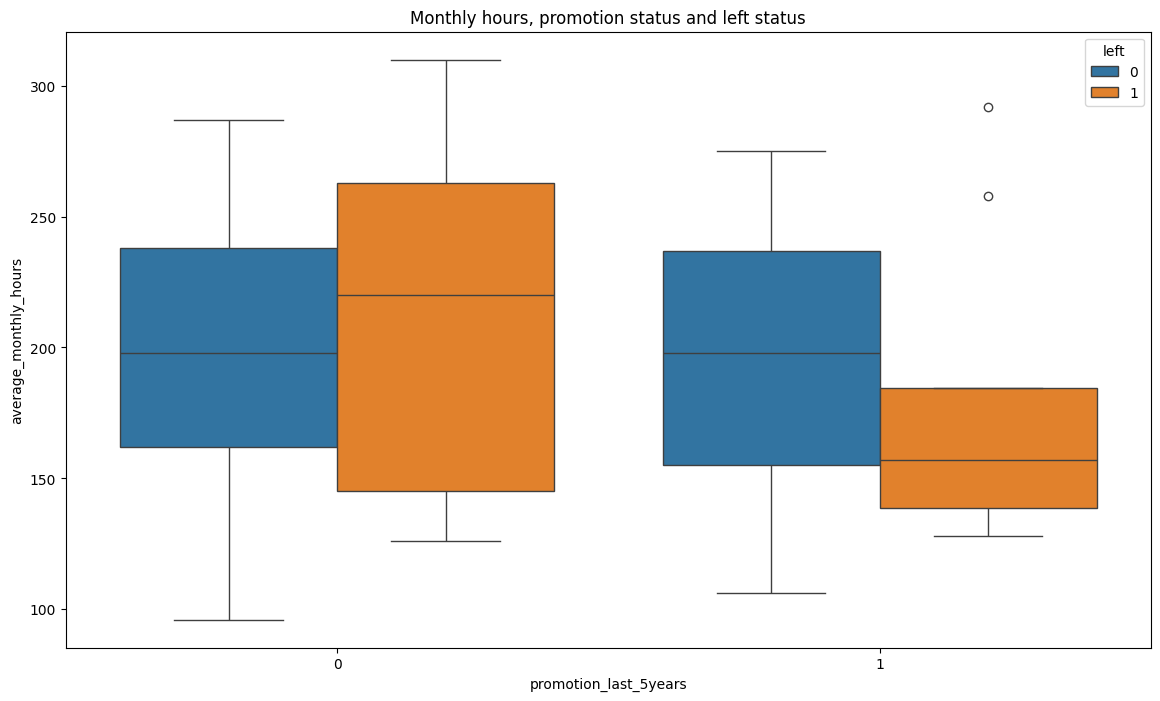

In [212]:
# Create a plot comparing monthly hours, promotion status and left status
plt.figure(figsize=(14,8))
sns.boxplot(x='promotion_last_5years', y='average_monthly_hours', hue='left', data=df1)
plt.title('Monthly hours, promotion status and left status')
plt.show()

##### Insights
- Those that were not promoted within the last 5 years had a much wider range of monthly hours in which they left the company. For those that were promoted, this was far more condensed, which is unsurprising, as it would be expected that those promoted were likely more engaged and better compensated.

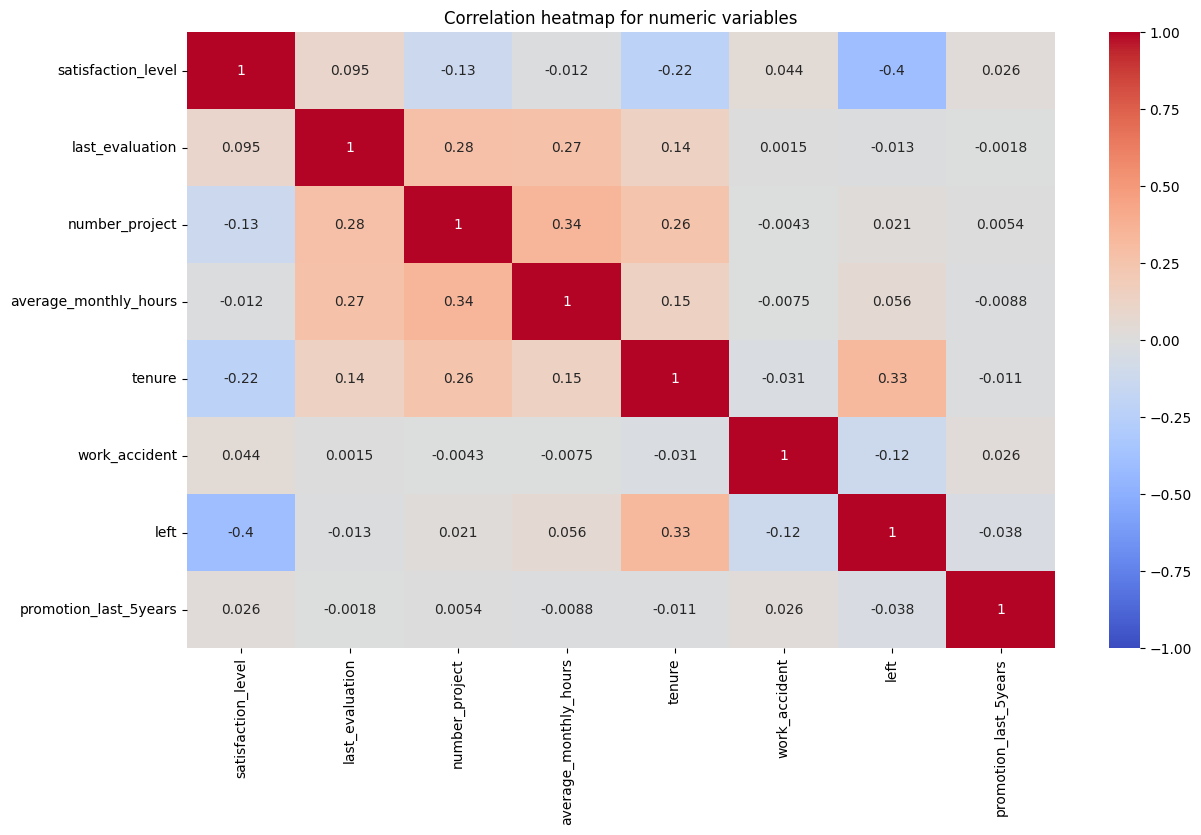

In [213]:
# Create a correlation heatmap for numeric variables
plt.figure(figsize=(14,8))
sns.heatmap(df1.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation heatmap for numeric variables')
plt.show()

##### Insights
- There do not appear to be many variables that are highly correlated. Some, such as last_evaluation and number_project, last_evaluation and average_monthly_hours, number_project and average_monthly_hours display low-medium correlation, but nothing too significant. There does, however, appear to be a quite significant negative correlation between satisfaction and left, which based on the plots created prior, is not surprising. A negative correlation also exists between number_project and tenure. These are likely to be viable features.

## Step 2. Data Exploration (Final EDA)


In [214]:
# Check the dataframe
df1.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low  
5       3              0     1                      0      sales     low

In [215]:
# Encode categorical variables
df2 = df1.copy()
df2['salary'] = (
    df2['salary'].astype('category')
    .cat.set_categories(['low','medium','high'])
    .cat.codes
)

# Dummy encode the department variable
df2 = pd.get_dummies(df2, drop_first=False)

# Display the new dataframe.
df2.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   
5       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

### Statistical Tests

Since the goal is to identify drivers of employee churn, statistical tests will be completed between the features and the dependent variable to test for correlation significance. This will aid in determining which features will be included in model development.

#### Check Assumptions

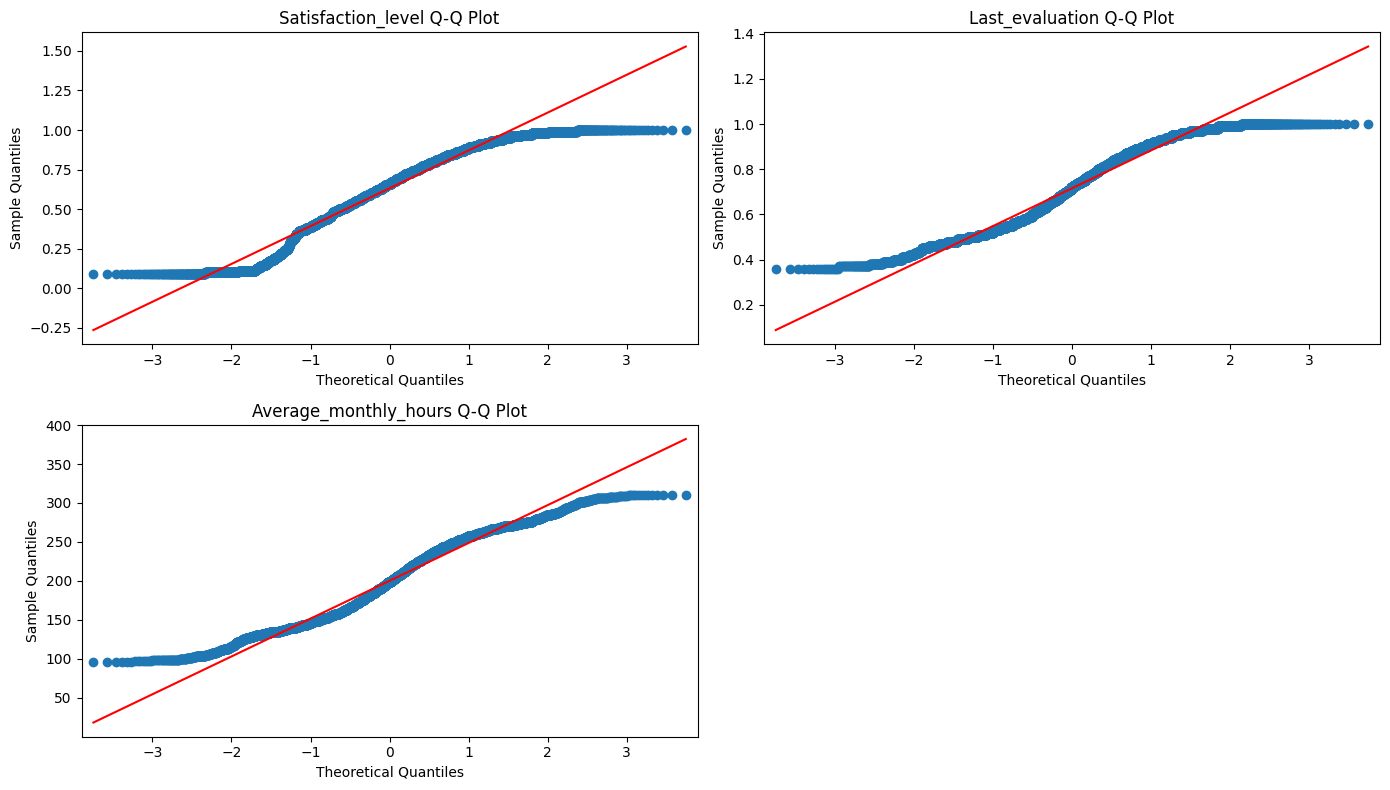

In [216]:
# Check normality assumption of continuous variables with Q-Q Plot
plt.figure(figsize=(14,8))
continuous_numeric_variables = ['satisfaction_level','last_evaluation','average_monthly_hours']

for i, col in enumerate(continuous_numeric_variables):
    plt.subplot(2,2, i + 1)
    sm.qqplot(df2[col], line='s', ax=plt.gca())
    plt.title(f'{col.capitalize()} Q-Q Plot')

plt.tight_layout()
plt.show()

##### Insights
- The continuous numeric variables appear to follow an approximately normal distribution.

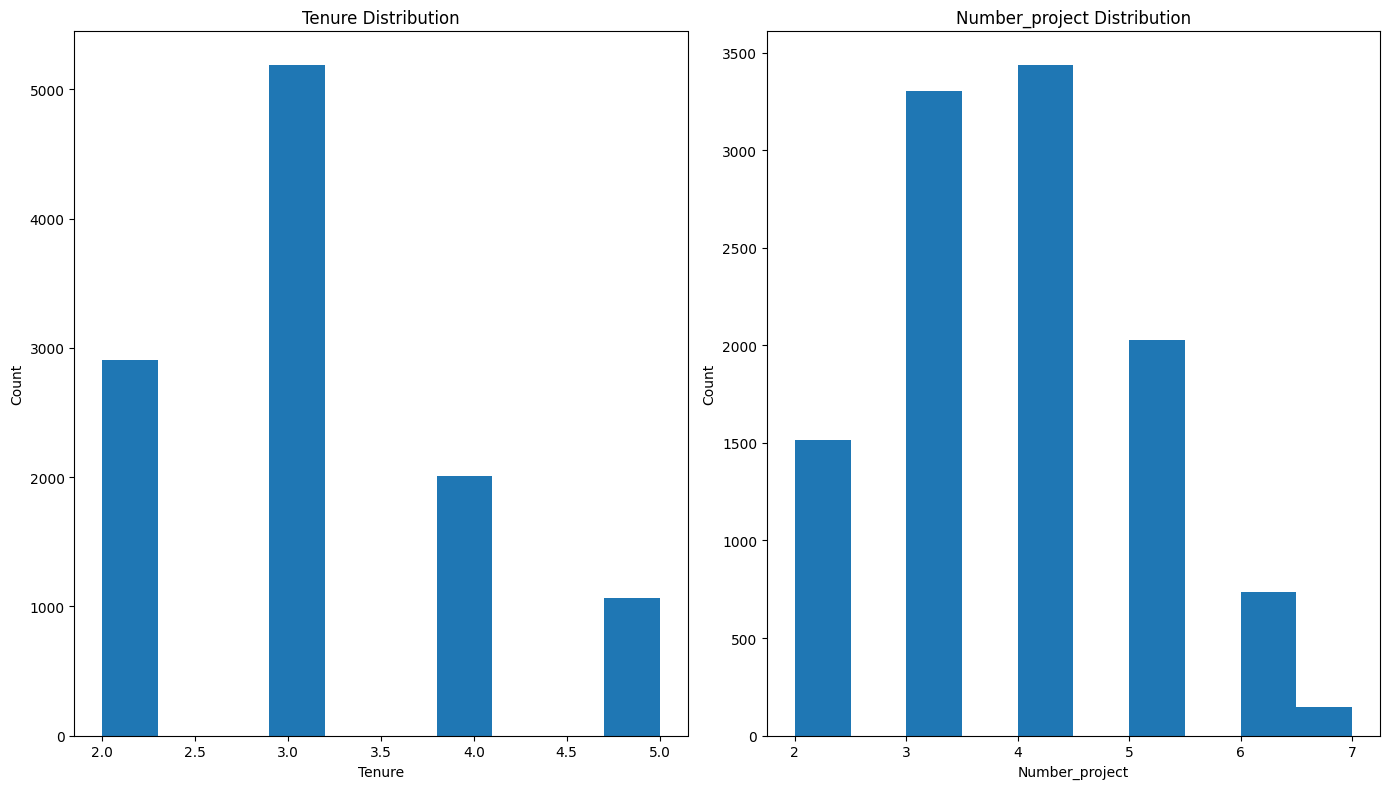

In [217]:
# Check normality assumption of discrete numeric variables
plt.figure(figsize=(14,8))
discrete_numeric_variables = ['tenure','number_project']

for i, col in enumerate(discrete_numeric_variables):
    plt.subplot(1,2, i + 1)
    plt.hist(df2[col])
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.tight_layout()

##### Insights
- Among the discrete numeric variables, there also appears to be an approximate normal distribution, although slightly less so for Tenure.

#### Independent T-Tests for Numeric and Binary Features

**Null Hypothesis (H0):** There is no statistically significant difference between the feature and whether the employee left.

**Alternative Hypothesis (HA):** There is a statistically significant difference between the feature and whether the employee left.

- The p-value tells you whether these differences are statistically significant.
- A higher absolute t-statistic indicates a greater difference between the group means relative to the variability within the groups.



In [218]:
# Test whether there is a statistically significant relationship between continuous numeric variables, boolean variables and the target variable.
numeric_features = df2.select_dtypes(include=['float64', 'int64', 'int32']).columns
numeric_features = numeric_features.drop('left')

# Separate binary features from continuous/discrete numeric features
binary_features = [col for col in numeric_features if df2[col].nunique() == 2 and set(df2[col].unique()) == {0, 1}]
numeric_features = [col for col in numeric_features if col not in binary_features]

print('Continuous and Discrete Numeric Features')
for feature in numeric_features:
    group1 = df2[df2['left'] == 0][feature]
    group2 = df2[df2['left'] == 1][feature]
    t_stat, p_value = ttest_ind(group1, group2)
    print(f"Feature: {feature}, T-statistic: {t_stat}, P-value: {p_value}")

print("")

print('Binary Features')
for feature in binary_features:
    contingency_table = pd.crosstab(df2[feature], df2['left'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Feature: {feature}, Chi-square: {chi2}, P-value: {p_value}")

Continuous and Discrete Numeric Features
Feature: satisfaction_level, T-statistic: 46.12261447530468, P-value: 0.0
Feature: last_evaluation, T-statistic: 1.4068047835759612, P-value: 0.1595131176861378
Feature: number_project, T-statistic: -2.27222537376577, P-value: 0.023091832947809855
Feature: average_monthly_hours, T-statistic: -5.954871901880153, P-value: 2.6811202906526424e-09
Feature: tenure, T-statistic: -36.34138707497283, P-value: 2.0536637654021257e-273

Binary Features
Feature: work_accident, Chi-square: 169.93204340725964, P-value: 7.656123004167563e-39
Feature: promotion_last_5years, Chi-square: 15.615313887994537, P-value: 7.762338696382768e-05


# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Recall model assumptions

**Logistic Regression model assumptions**
Outcome variable is categorical
- True.

Observations are independent of each other
- True, there's no reason to believe one employee is related to another.

No severe multicollinearity among X variables
- True, there were no highly correlated features.

No extreme outliers
- Tenure had a few outliers, but they weren't extreme, and were handled during the EDA stage.

Linear relationship between each X variable and the logit of the outcome variable.

Sufficiently large sample size
- 12,000 rows is not a very large sample, but large enough for the models being built, particularly when splitting the train, validation and test sets.


### Reflect on these questions as you complete the constructing stage.

*Do you notice anything odd?*
- The coefficients for salary_low does not appear to be as significant as I was expecting them to be, at the very least salary_low. Salary_high on the other hand does appear to be significant, which would be expected.

*Which independent variables did you choose for the model and why?*
- Based on the independent t-tests and plots created earlier, I kept all variables except for the specific departments and the last_evaluation variable, which did not appear to have a statistically significant relationship with whether an employee left or stayed.

*Are each of the assumptions met?*
- The assumptions are met.

*How well does your model fit the data?*
- The model appears to fit the data relatively well, at least when it comes to making prediction on the probability of a particular employee staying. The performance of the model regarding whether an employee will leave is not nearly as good.

*Can you improve it? Is there anything you would change about the model?*
- Further feature selection can be performed, as well as the engineering of new variables from others that may not have had much predictive signal on their own. The model can also be tuned further.

*What resources do you find yourself using as you complete this stage?*
- I found myself utilizing past project notebooks, as they contained many of the same steps performed.

*Do you have any ethical considerations in this stage?*
- My only concern at this point is that the model performs well at predicting whether an employee will stay, but does not perform nearly as well regarding whether an employee will leave. Additionally, based on the data gathered, it appears many employees are overworked in this company, and if the model is used to target those that will stay, regardless of changing the work culture, it may lead the client to use this informatino to discriminate against those indicated as not staying.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

- The type of prediction task is a binary outcome of either 1 = left or 0 = did not leave.

### Identify the types of models most appropriate for this task.

- A logistic regression model, in addition to a decision tree, random forest and xgboost would likely be adequate for this type of task.

### Modeling

Add as many cells as you need to conduct the modeling process.

#### Variable Selection

In [219]:
df2.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   
5       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

In [220]:
# Select the variables that will be kept for the model.
y = df2['left']
X = df2.drop(['left'], axis=1)

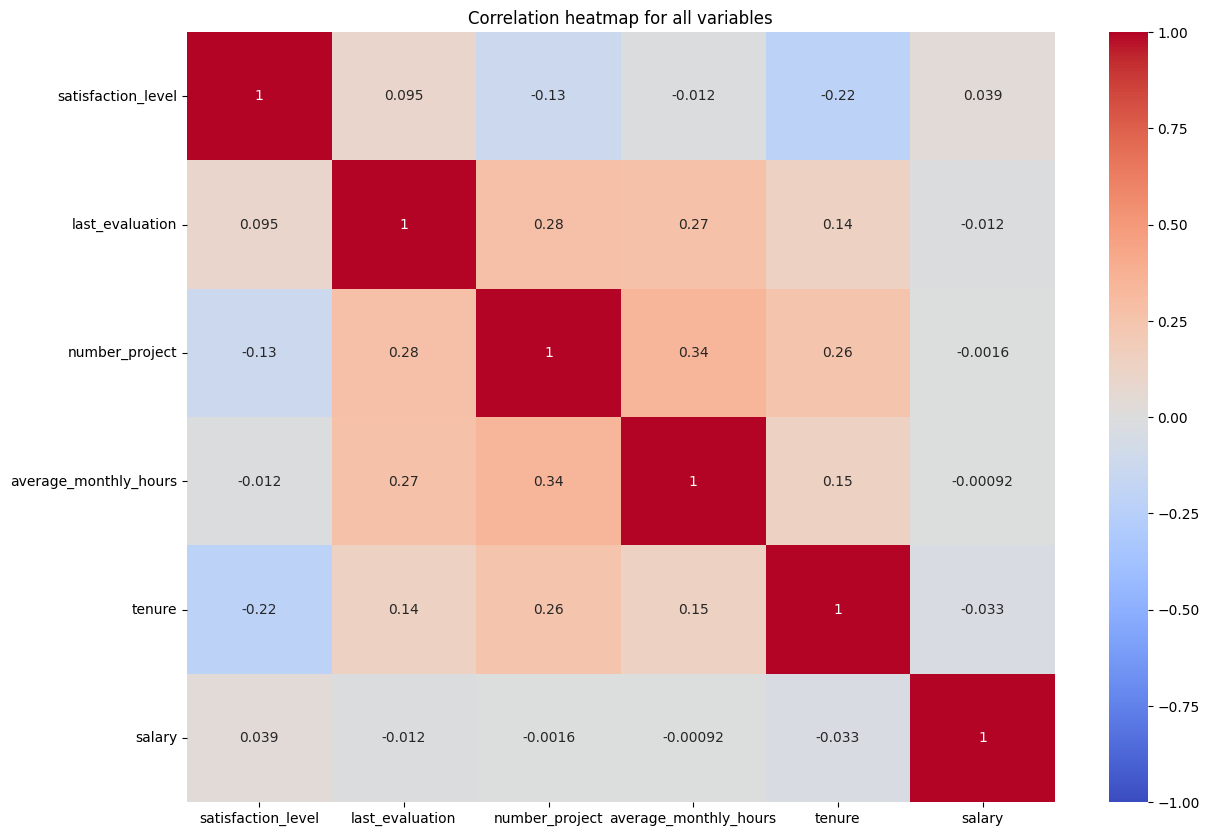

In [221]:
# Create a heatmap to visualize the correlation between variables.
plt.figure(figsize=(14,10))
sns.heatmap(df2[['satisfaction_level','last_evaluation','number_project','average_monthly_hours','tenure','salary']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation heatmap for all variables')
plt.show()

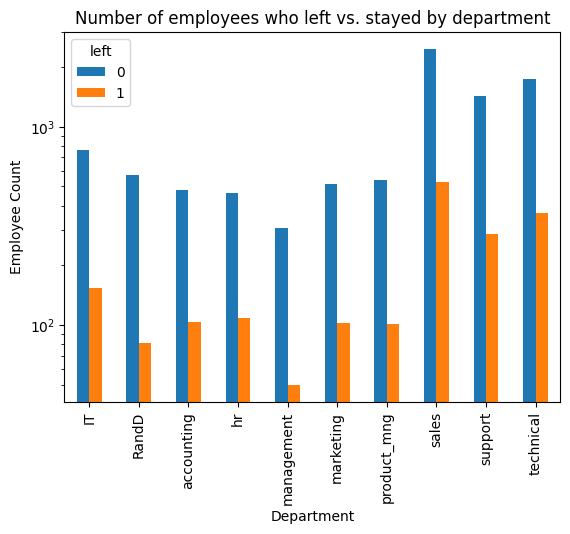

In [222]:
# Create a stacked bar plot to visualize number of employees who left vs. stayed by department.
pd.crosstab(df1['department'], df1['left']).plot(kind='bar')
plt.title('Number of employees who left vs. stayed by department')
plt.ylabel('Employee Count')
plt.xlabel('Department')
plt.yscale('log')
plt.show()


#### Logistic Regression

In [223]:
# Create a Logistic Regression Model

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

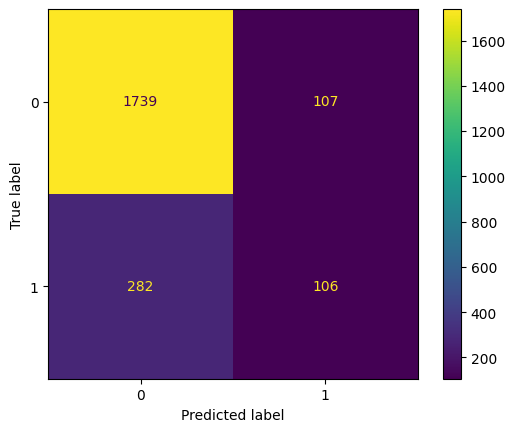

In [224]:
# Create a confusion matrix.
log_cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)

# Create a display object for the confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_reg.classes_)

# Plot the confusion matrix.
log_disp.plot(values_format='')

# Display the confusion matrix.
plt.show()

**True Negatives - *Upper-left***: The number of people who did not leave that the model accurately predicted did not leave.

**False Positives - *Upper-right***: The number of people who did not leave the model inaccurately predicted as leaving.

**False Negatives - *Bottom-left***: The number of people who left that the model inaccurately predicted did not leave.

**True Positives - *Bottom-right***: The number of people who left the model accurately predicted as leaving.

In [225]:
# Check the model coefficients.
pd.Series(log_reg.coef_[0], index=X.columns)

satisfaction_level       -4.449358
last_evaluation          -0.172774
number_project           -0.465530
average_monthly_hours     0.003542
tenure                    1.055579
work_accident            -1.531738
promotion_last_5years    -0.403334
salary                   -0.577372
department_IT            -0.068694
department_RandD         -0.505546
department_accounting    -0.100857
department_hr             0.023924
department_management    -0.137601
department_marketing     -0.059235
department_product_mng   -0.171490
department_sales          0.109006
department_support       -0.049290
department_technical      0.007615
dtype: float64

##### Insights
- The model coefficients for the Logistic Regression model represent the change in the log-odds of the outcome variable 'left' for a one-unit change in the predictor variable; the odds of the outcome occuring.

In [226]:
print(log_reg.intercept_)

[-1.07191788]


In [227]:
# Create classification report for the logistic regression model
log_report = classification_report(y_test, y_pred)
print(log_report)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1846
           1       0.50      0.27      0.35       388

    accuracy                           0.83      2234
   macro avg       0.68      0.61      0.63      2234
weighted avg       0.80      0.83      0.80      2234



The model performs well on predicting employees that will stay, but if the goal is to predict those that will leave, the scores are significantly lower.

#### Check Assumptions

In [228]:
# Check for linearity between the features and the logit of the outcome variable using the models predict_proba()
training_probabilities = log_reg.predict_proba(X_train)

In [229]:
print(training_probabilities)

[[0.62339158 0.37660842]
 [0.96083295 0.03916705]
 [0.9831664  0.0168336 ]
 ...
 [0.96196584 0.03803416]
 [0.77436741 0.22563259]
 [0.97235817 0.02764183]]


In [230]:
logit_data = X_train.copy()
logit_data['logit'] = [np.log(prob[1]/prob[0]) for prob in training_probabilities]

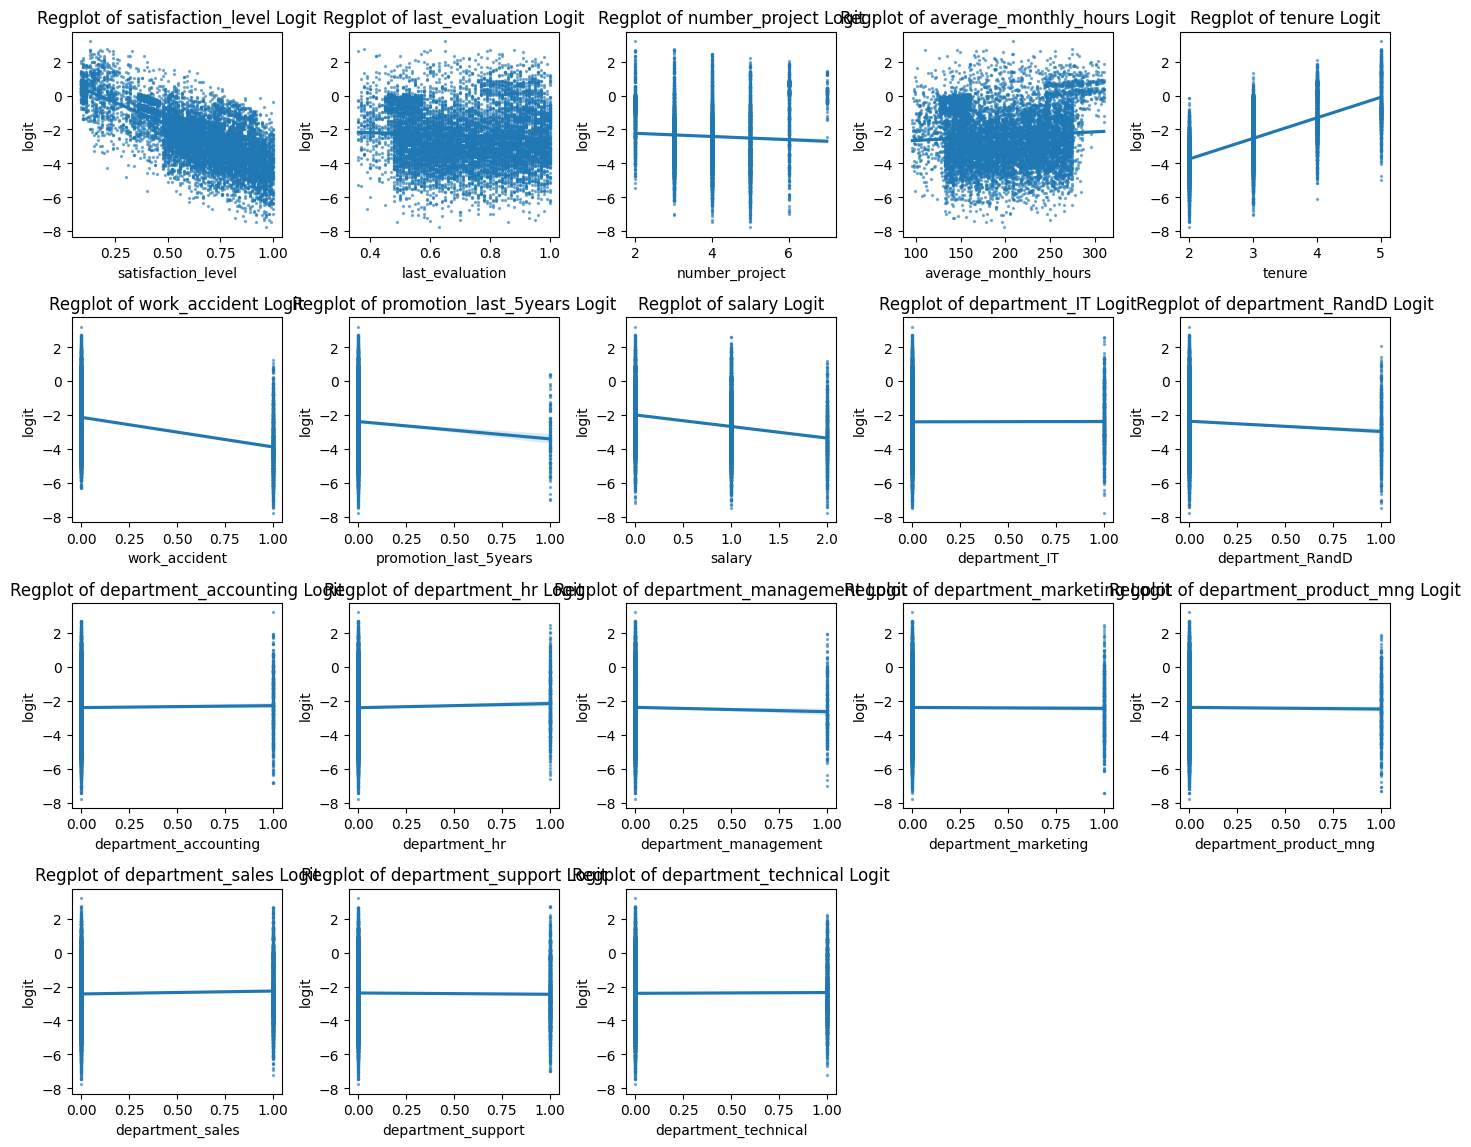

In [231]:
# Plot the regplot for each discrete and continuous numeric feature

plt.figure(figsize=(14,14))

for i, feature in enumerate(logit_data.columns[:-1]):
    plt.subplot(5, 5, i + 1)
    sns.regplot(x=feature, y='logit', data=logit_data, scatter_kws={'s':2,'alpha':0.5})
    plt.title(f'Regplot of {feature} Logit')
    plt.tight_layout()

plt.show()

##### Insights
- A rather linear relationship appears to be maintained betweeen the features and the logit of the outcome variable.

#### Decision Tree #1

In [232]:
# Create a Decision Tree Model

# Define the dependent and independent variables
X = df2.drop('left', axis=1)
y = df2['left']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [233]:
# Instantiate the decision tree model
dt = DecisionTreeClassifier(random_state=42)

# Assign a dictionary of hyperparameters
cv_params = {
    'max_depth': [3, 5, 7, 8, 11],
    'min_samples_split': [2, 3, 5, 7, 8, 11],
    'min_samples_leaf': [1, 2, 3, 5, 7, 8, 11]
}

# Assign a dictionary of scoring metrics to be used
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate the GridSearchCV object
dt1 = GridSearchCV(dt, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [234]:
# Fit the model to the data
dt1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 8, 11],
                         'min_samples_leaf': [1, 2, 3, 5, 7, 8, 11],
                         'min_samples_split': [2, 3, 5, 7, 8, 11]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [235]:
# Check best parameters
dt1.best_params_

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [236]:
# Check model performance
dt1.best_score_

0.9710655672194031

##### Insights
- The AUC score is very high, indicating the model does an exmplary job predicting clients who will leave.

In [237]:
# Acquire all scores from grid search.

def make_results(model_name:str, model_object, metric:str):
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'accuracy': 'mean_test_accuracy',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1'}
    
    cv_results = pd.DataFrame(model_object.cv_results_)
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax()]

    auc = best_estimator_results['mean_test_roc_auc']
    accuracy = best_estimator_results['mean_test_accuracy']
    precision = best_estimator_results['mean_test_precision']
    recall = best_estimator_results['mean_test_recall']
    f1 = best_estimator_results['mean_test_f1']

    table=pd.DataFrame()
    table=pd.DataFrame({'model': [model_name],
                        'auc': [auc],
                        'accuracy': [accuracy],
                        'precision': [precision],
                        'recall': [recall],
                        'f1': [f1]
                        })
    return table

In [238]:
dt1_cv_results = make_results('Decision Tree CV', dt1, 'auc')
dt1_cv_results

model       auc  accuracy  precision    recall       f1
0  Decision Tree CV  0.971066  0.979701   0.965577  0.912099  0.93795

##### Insights
- The resulting scores indicate high performance. However, a Random Forest model may perform even better, and is more robust to overfitting, outliers and imbalance within variables.

##### Random Forest #1

In [239]:
# Instantiate the random forest model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters
cv_params = {'max_depth': [5], 
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [4],
             'n_estimators': [500],
             }  

# Assign a dictionary of scoring metrics to be used
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate the GridSearchCV object
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [240]:
rf1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [4], 'n_estimators': [500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [241]:
# Define a path to save the model
path = './'

In [242]:
def write_pickle(path, model_object, save_as:str):
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [243]:
def read_pickle(path, saved_model_name:str):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [244]:
# Write Pickle
write_pickle(path, rf1, 'hr_rf1')

In [245]:
# Read Pickle
rf1 = read_pickle(path, 'hr_rf1')

In [246]:
# Check the best AUC score
rf1.best_score_

0.9789817552371544

In [247]:
# Check optimal parameters
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [248]:
# Get all CV Scores
rf1_cv_results = make_results('Random Forest CV', rf1, 'auc')
print(dt1_cv_results)
print(rf1_cv_results)

              model       auc  accuracy  precision    recall       f1
0  Decision Tree CV  0.971066  0.979701   0.965577  0.912099  0.93795
              model       auc  accuracy  precision    recall        f1
0  Random Forest CV  0.978982   0.98018   0.968352  0.912131  0.939329


In [249]:
# Define a function that gets all scores from a model's predictions
def get_scores(model_name:str, model, X_test_data, y_test_data):

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'auc': [auc],
                          'accuracy': [accuracy],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1]
                          })
    return table

In [250]:
# Use the best performing model to predict on the test set
rf1_test_scores = get_scores('rf1 test',rf1, X_test, y_test)
rf1_test_scores

model       auc  accuracy  precision    recall        f1
0  rf1 test  0.963245  0.985315   0.982063  0.929936  0.955289

##### Insights
- The AUC score was higher in the first iteration of the Random Forest model, but the other scores were slightly lower.

##### Feature Engineering

In [251]:
# Drop satisfaction level.
df2 = df2.drop('satisfaction_level', axis=1)

# Display the first few rows of the dataframe
df2.head()

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   
5             0.50               2                    153       3   

   work_accident  left  promotion_last_5years  salary  department_IT  \
0              0     1                      0       0          False   
2              0     1                      0       1          False   
3              0     1                      0       0          False   
4              0     1                      0       0          False   
5              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

In [252]:
# Create a new overworked column.
df2['overworked'] = df2['average_monthly_hours']

# Inspect the max & min average monthly hours.
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


In [253]:
# Encode every value above 175 as "True" and every value below 175 as "False".
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display the first few rows of the dataframe
df2.head()

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   
5             0.50               2                    153       3   

   work_accident  left  promotion_last_5years  salary  department_IT  \
0              0     1                      0       0          False   
2              0     1                      0       1          False   
3              0     1                      0       0          False   
4              0     1                      0       0          False   
5              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  overworked  
0              True               False                 False           0  
2              True               False                 False           1  
3              True               False                 False           1  
4              True               False                 False           0  
5              True               False                 False           0

In [254]:
# Drop the 'average_monthly_hours' column.
df2 = df2.drop('average_monthly_hours', axis=1)

# Display the first few rows of the dataframe
df2.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   
5             0.50               2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0          False             False   
2                      0       1          False             False   
3                      0       0          False             False   
4                      0       0          False             False   
5                      0       0          False             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   
5                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   
5                 False                   False              True   

   department_support  department_technical  overworked  
0               False                 False           0  
2               False                 False           1  
3               False                 False           1  
4               False                 False           0  
5               False                 False           0

In [255]:
# Isolate the target and features.
y = df2['left']
X = df2.drop('left', axis=1)

In [256]:
# Create the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

##### Decision Tree #2

In [257]:
# Instantiate the decision tree model.
dt = DecisionTreeClassifier(random_state=42)

# Assign a dictionary of hyperparameters.
cv_params = {
    'max_depth': [3, 5, 7, 8, 11],
    'min_samples_split': [2, 3, 5, 7, 8, 11],
    'min_samples_leaf': [1, 2, 3, 5, 7, 8, 11]
}

# Assign a dictionary of scoring metrics to be used.
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate the GridSearchCV object.
dt2 = GridSearchCV(dt, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [258]:
dt2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 8, 11],
                         'min_samples_leaf': [1, 2, 3, 5, 7, 8, 11],
                         'min_samples_split': [2, 3, 5, 7, 8, 11]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [259]:
dt2.best_params_

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [260]:
dt2.best_score_

0.9588678434037107

In [261]:
# Get all CV scores.
dt2_cv_results = make_results('Decision Tree 2 CV', dt2, 'auc')
print(dt1_cv_results)
print(dt2_cv_results)

              model       auc  accuracy  precision    recall       f1
0  Decision Tree CV  0.971066  0.979701   0.965577  0.912099  0.93795
                model       auc  accuracy  precision    recall        f1
0  Decision Tree 2 CV  0.958868  0.960119   0.865792  0.905726  0.884757


##### Random Forest #2

In [262]:
# Instantiate the model.
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters.
cv_params = {'max_depth': [5], 
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [4],
             'n_estimators': [500],
             }

# Assign a dictionary of scoring metrics to capture.
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate the GridSearchCV object.
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [263]:
rf2.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [4], 'n_estimators': [500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [264]:
# Write pickle.
write_pickle(path, rf2, 'hr_rf2')

In [265]:
# Read pickle.
rf2 = read_pickle(path, 'hr_rf2')

In [266]:
# Check best params.
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [267]:
# Check best AUC score on CV
rf2.best_score_

0.9709291159915465

In [268]:
# Acquire all CV scores.
rf2_cv_results = make_results('Random Forest 2 CV', rf2, 'auc')
print(dt2_cv_results)
print(rf2_cv_results)

                model       auc  accuracy  precision    recall        f1
0  Decision Tree 2 CV  0.958868  0.960119   0.865792  0.905726  0.884757
                model       auc  accuracy  precision    recall        f1
0  Random Forest 2 CV  0.970929  0.966448   0.895719  0.906459  0.900985


In [269]:
# Acquire predictions on the test data.
rf2_test_scores = get_scores('rf2_test', rf2, X_test, y_test)
rf2_test_scores

model       auc  accuracy  precision    recall        f1
0  rf2_test  0.943366  0.966332   0.893528  0.908705  0.901053

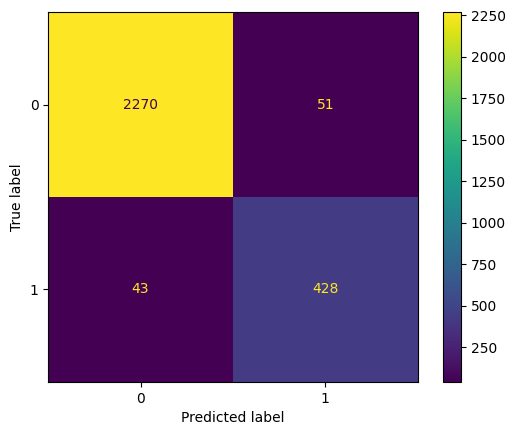

In [270]:
# Plot a confusion matrix for the best performing model.
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds)

# Plot confusion matrix.
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf2.classes_)
disp.plot(values_format='');

##### Insights
- The model seems to perform fairly well. It predicts more false positives than false negatives, indicating that some employees may be identified as at risk of quitting or getting fired when that's not the case. That being said, false positives in this case are less problematic than false negatives, which would mean potentially missing employees who are going to quit.

#### Decision Tree Splits

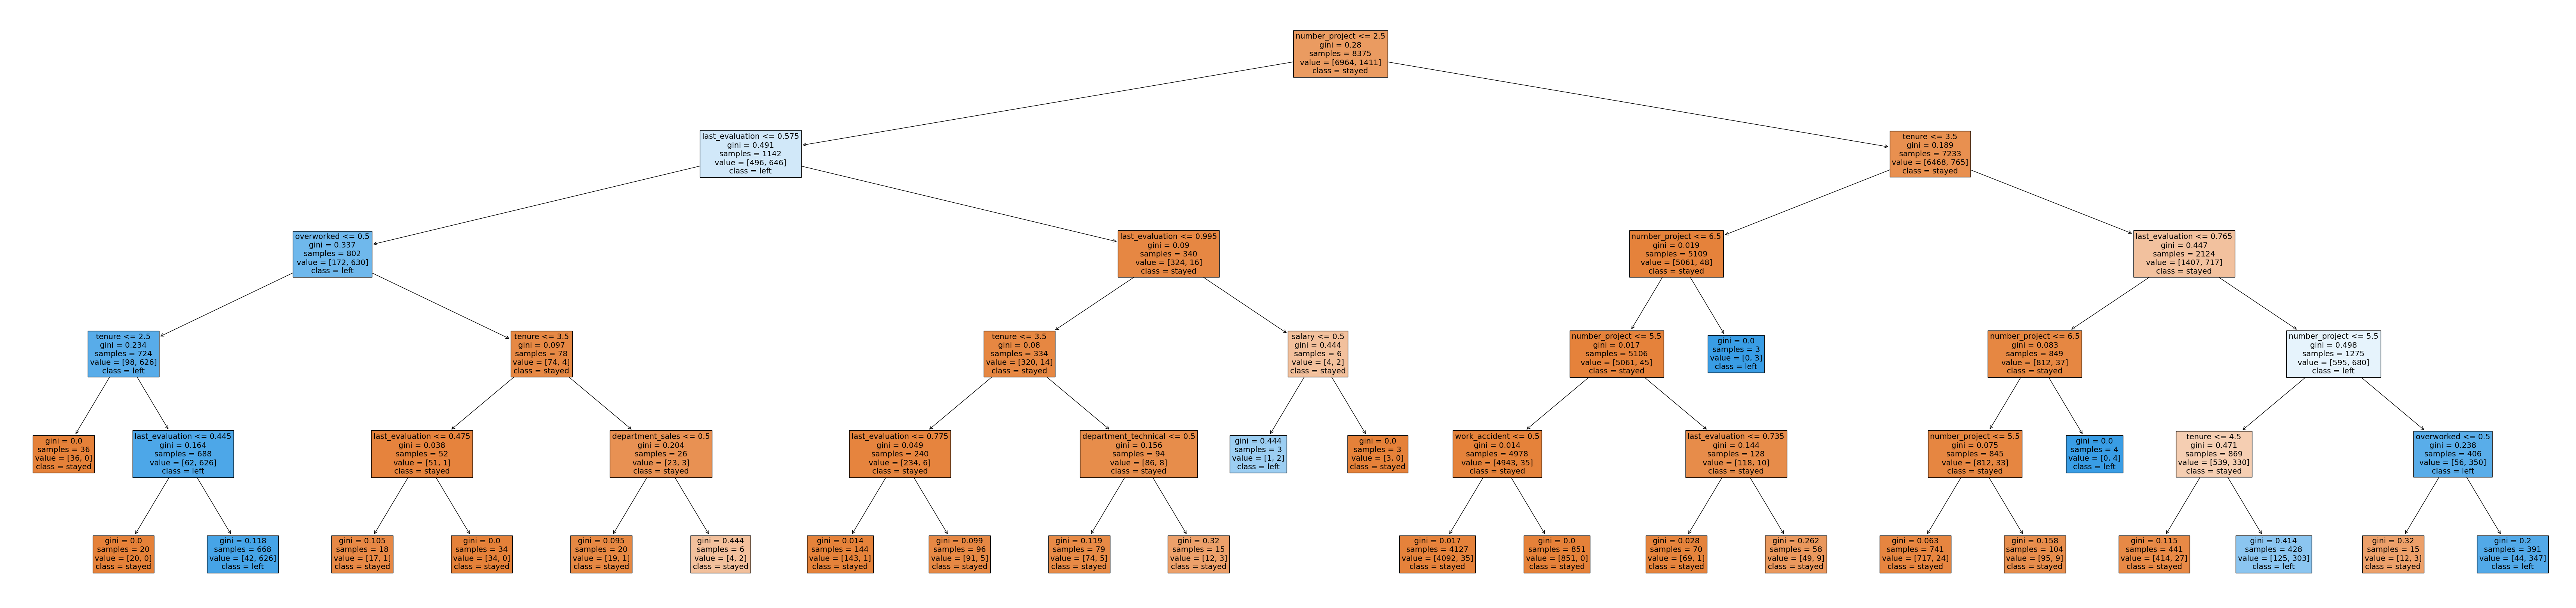

In [271]:
# Plot the Decision Tree splits.
plt.figure(figsize=(85,20))
plot_tree(dt2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [272]:
# Acquire feature importances for the Decision Tree model.
dt2_importances = pd.DataFrame(dt2.best_estimator_.feature_importances_,
                               columns=['gini_importance'],
                               index=X.columns)
dt2_importances = dt2_importances.sort_values(by='gini_importance', ascending=False)

# Extract importances > 0.
dt2_importances = dt2_importances[dt2_importances['gini_importance'] > 0]
dt2_importances

gini_importance
tenure                       0.316900
number_project               0.316178
last_evaluation              0.305228
overworked                   0.060202
salary                       0.000751
department_sales             0.000418
department_technical         0.000266
work_accident                0.000057

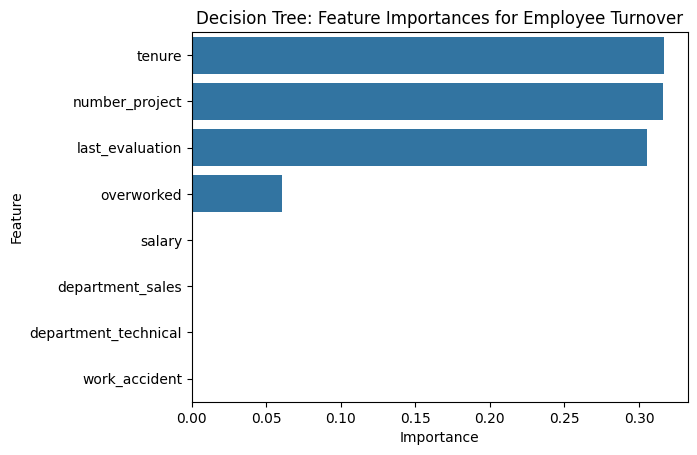

In [273]:
# Plot the feature importances for the Decision Tree model.
sns.barplot(data=dt2_importances, x='gini_importance', y=dt2_importances.index, orient='h')
plt.title('Decision Tree: Feature Importances for Employee Turnover')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()

In [274]:
# Acquire feature importances for the Random Forest model.
rf2_importances = pd.DataFrame(rf2.best_estimator_.feature_importances_,
                               columns=['gini_importance'],
                               index=X.columns)
rf2_importances = rf2_importances.sort_values(by='gini_importance', ascending=False)

# Extract importances > 0.
rf2_importances = rf2_importances[rf2_importances['gini_importance'] > 0]
rf2_importances

gini_importance
number_project                 0.367225
last_evaluation                0.311365
tenure                         0.236839
overworked                     0.079686
department_IT                  0.000914
salary                         0.000876
department_technical           0.000634
department_sales               0.000627
department_management          0.000307
department_RandD               0.000289
department_support             0.000245
work_accident                  0.000245
department_product_mng         0.000238
department_marketing           0.000198
department_accounting          0.000157
department_hr                  0.000107
promotion_last_5years          0.000048

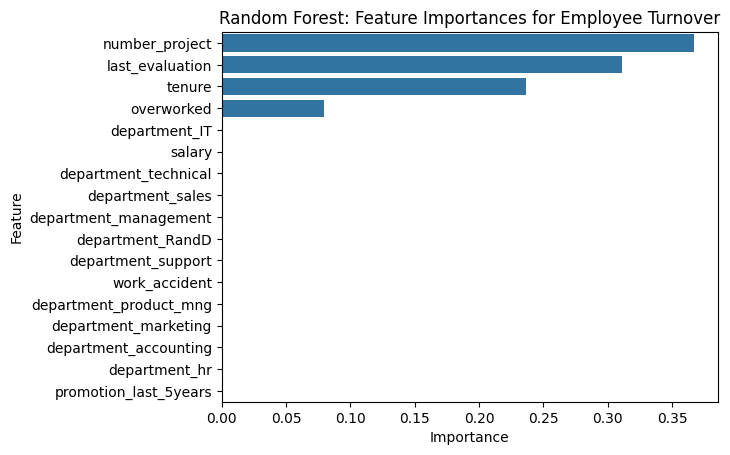

In [105]:
# Plot the feature importances for the Random Forest model.
sns.barplot(data=rf2_importances, x='gini_importance', y=rf2_importances.index, orient='h')
plt.title('Random Forest: Feature Importances for Employee Turnover')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()

##### Insights
- The plot above indicates that the most importance features in the Random Forest model for predicting the outcome variable 'left' is 'number_project', 'last_evaluation', 'tenure' and 'overworked.' These are the same features identified in the Decision Tree feature importances as well.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






### Reflect on these questions as you complete the executing stage.

*What key insights emerged from your model(s)?*

The final model indicates that the most important features are:
- number_project-0.367225
- last_evaluation-0.311365
- tenure-0.236839
- overworked-0.079686

*What business recommendations do you propose based on the models built?*

Based on the feature importances acquired from the model, to improve employee retention, focus needs to be placed on the work culture, particularly how overworked employees are. Factors that appear to influence this are largely the number of hours an employee works and number of projects.

*What potential recommendations would you make to your manager/company?*

A greater emphasis on work-life balance needs to be implemented, with a cap on the number of projects any employee can be given at a time. Additionally, ensuring employees are not working too many hours each month needs to be considered as well.

For employees that have been with the company for four years, conduct investigation regarding why higher tenurd employees are dissatisfied and additionally, consider promotions for select groups.

*Do you think your model could be improved? Why or why not? How?*

The model performs very well, and there is likely little room for improvement. However, additional tweaks could be made to the hyperparameters to potentially improve the model further. Furthermore, additional features could be engineered from ones that were not initially considered important.

*Given what you know about the data and the models you were using, what other questions could you address for the team?*

Many questions pertaining to overall employee dissatisfaction can be answered at this point. Some additional questions that may be answered are:
- On average, how many years does an employee remain with the company?
- How many hours on average does an employee work?
- How many hours of overtime are employees working on average?
- What is the average maximum number of projects an employee can work on before satisfaction drops?

*What resources do you find yourself using as you complete this stage? (Make sure to include the links.)*
- I often referred to prior project notebooks, as they contained many of the same steps and processes.

*Do you have any ethical considerations in this stage?*
- The informated gleaned from this model should drive the company to institute a better work-life balance. The only ethical considerations I have at this point, is the insights derived from the model could be used for the wrong purposes, such as narrowing down employees who are more likely to leave because they aren't willing to work as many hours as others.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results


#### Logistic Regression

The logistic regression model achieved a precision of 86%, recall of 94%, f1-score of 90% and accuracy of 82% for employees who stay. However, the prediction scores for those that left are significantly lower.

#### Tree-based Machine Learning

The final scores of the tree-based models performed quite well, with the final Random Forest model performing better than the final Decision Tree model, after feature engineering.

Decision Tree 2
          
- auc - 0.958868 
- accuracy - 0.960119 
- precision - 0.865792 
- recall - 0.905726 
- f1 - 0.884757

Random Forest 2
                
              
- auc - 0.970929 
- accuracy - 0.966448
- precision - 0.895719
- recall - 0.906459
- f1 - 0.900985

### Conclusion, Recommendations, Next Steps


The visualizations, models and feature importances confirm that the employees at the company are overworked. To improve retention, the recommended next steps are:

- Add a limit to the number of projects employees can work on at once.
- Additional considerations for promotions for employees with high tenure.
- Employees working longer hours should be rewarded for doing so, otherwise, cap the hours employees can work.
- In a fair evaluation system, high evaluation scores should be present across all groups of employees worked, regardless of the number of hours. Consideration of an improvement method of evaluation should be considered.